In [264]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from matplotlib.lines import Line2D


In [4]:
pd.read_csv('C:\\Users\\piercev1\\Documents\\Research\\Genocide SHOAH Account XML Files\\exp_gps_keywords_no_ne.csv')
pd.read_csv('C:\\Users\\piercev1\\Documents\\Research\\Genocide SHOAH Account XML Files\\keyword_percentages_by_exp_gp.csv')

Unnamed: 0                    Keyword  Jewish Survivor  \
0              0    extended family members     3.736700e-02   
1              1                family life     2.476155e-02   
2              2                   brothers     2.389303e-03   
3              3          family businesses     6.418647e-03   
4              4                    schools     1.184029e-02   
...          ...                        ...              ...   
4239        4239               Eubee (Ship)     3.180225e-07   
4240        4240   Forst (Germany)(generic)     3.180225e-07   
4241        4241          Brit Ivrit Olamit     3.180225e-07   
4242        4242  Dusnok (Hungary)(generic)     3.180225e-07   
4243        4243  Chelmno (Poland)(generic)     3.180225e-07   

      Miscellaneous (World War II)  Rescuer and Aid Provider (Holocaust)  \
0                         0.031086                              0.016898   
1                         0.036568                              0.027908   
2                         0.002656                              0.000971   
3                         0.005030                              0.002530   
4                         0.015147                              0.018801   
...                            ...                                   ...   
4239                      0.000000                              0.000000   
4240                      0.000000                              0.000000   
4241                      0.000000                              0.000000   
4242                      0.000000                              0.000000   
4243                      0.000000                              0.000000   

      Liberator (World War II)  Sinti and Roma Survivor  Political Prisoner  \
0                     0.011637                 0.030327            0.007424   
1                     0.016431                 0.029336            0.007424   
2                     0.000828                 0.002577            0.000881   
3                     0.002702                 0.002775            0.000944   
4                     0.009066                 0.005649            0.013275   
...                        ...                      ...                 ...   
4239                  0.000000                 0.000000            0.000000   
4240                  0.000000                 0.000000            0.000000   
4241                  0.000000                 0.000000            0.000000   
4242                  0.000000                 0.000000            0.000000   
4243                  0.000000                 0.000000            0.000000   

      War Crimes Trial Participant  Non-Jewish Forced Laborer  ...  \
0                         0.009044                   0.016216  ...   
1                         0.016883                   0.031081  ...   
2                         0.000000                   0.000000  ...   
3                         0.000904                   0.000000  ...   
4                         0.012059                   0.021622  ...   
...                            ...                        ...  ...   
4239                      0.000000                   0.000000  ...   
4240                      0.000000                   0.000000  ...   
4241                      0.000000                   0.000000  ...   
4242                      0.000000                   0.000000  ...   
4243                      0.000000                   0.000000  ...   

      Hutu Power Opponent (1994 Genocide against the Tutsi in Rwanda)  \
0                                              0.007722                 
1                                              0.003861                 
2                                              0.000000                 
3                                              0.000000                 
4                                              0.003861                 
...                                                 ...                 
4239                   

In [5]:
keyword_expgps = pd.read_csv('C:\\Users\\piercev1\\Documents\\Research\\Genocide SHOAH Account XML Files\\exp_gps_keywords_no_ne.csv')
keyword_percent_expgps = pd.read_csv('C:\\Users\\piercev1\\Documents\\Research\\Genocide SHOAH Account XML Files\\keyword_percentages_by_exp_gp.csv')

In [6]:
keyword_expgps.head()

Unnamed: 0 Experience_Group                  Keyword
0           2  Jewish Survivor  extended family members
1           3  Jewish Survivor              family life
2           4  Jewish Survivor                 brothers
3           5  Jewish Survivor        family businesses
4           6  Jewish Survivor              family life

In [7]:
keyword_percent_expgps.head()

Unnamed: 0                  Keyword  Jewish Survivor  \
0           0  extended family members         0.037367   
1           1              family life         0.024762   
2           2                 brothers         0.002389   
3           3        family businesses         0.006419   
4           4                  schools         0.011840   

   Miscellaneous (World War II)  Rescuer and Aid Provider (Holocaust)  \
0                      0.031086                              0.016898   
1                      0.036568                              0.027908   
2                      0.002656                              0.000971   
3                      0.005030                              0.002530   
4                      0.015147                              0.018801   

   Liberator (World War II)  Sinti and Roma Survivor  Political Prisoner  \
0                  0.011637                 0.030327            0.007424   
1                  0.016431                 0.029336            0.007424   
2                  0.000828                 0.002577            0.000881   
3                  0.002702                 0.002775            0.000944   
4                  0.009066                 0.005649            0.013275   

   War Crimes Trial Participant  Non-Jewish Forced Laborer  ...  \
0                      0.009044                   0.016216  ...   
1                      0.016883                   0.031081  ...   
2                      0.000000                   0.000000  ...   
3                      0.000904                   0.000000  ...   
4                      0.012059                   0.021622  ...   

   Hutu Power Opponent (1994 Genocide against the Tutsi in Rwanda)  \
0                                           0.007722                 
1                                           0.003861                 
2                                           0.000000                 
3                                           0.000000                 
4                                           0.003861                 

   Victim’s Spouse (1994 Genocide against the Tutsi in Rwanda)  \
0                                           0.131579             
1                                           0.008772             
2                                           0.000000             
3                                           0.000000             
4                                           0.000000             

   Miscellaneous (1994 Genocide against the Tutsi in Rwanda)  \
0                                           0.014815           
1                                           0.000000           
2                                           0.000000           
3                                           0.000000           
4                                           0.029630           

   Armenian Survivor; Descendant (Armenian Genocide)  Rohingya Survivor  \
0                                           0.017699           0.025767   
1                                           0.026549           0.002454   
2                                           0.008850           0.007362   
3                                           0.000000           0.000000   
4                                           0.000000           0.008589   

   Descendant (Holocaust)  \
0                0.058981   
1                0.040214   
2                0.000000   
3                0.005362   
4                0.002681   

   Liberator (1994 Genocide against the Tutsi in Rwanda)  \
0                                           0.004975       
1                                           0.000000       
2                                           0.000000       
3                                           0.000000       
4                                           0.000000       

   Jewish Survivor; Rescuer and Aid Provider (Holocaust)  Scholar (Holocaust)  \
0                                           0.007576                      0.0 

In [8]:
keyword = keyword_percent_expgps.Keyword

In [9]:
len(keyword)

4244

In [10]:
exp_gps = keyword_expgps.Experience_Group.unique()

In [11]:
len(exp_gps)

40

In [12]:
print(exp_gps)

['Jewish Survivor' 'Miscellaneous (World War II)'
 'Rescuer and Aid Provider (Holocaust)' 'Liberator (World War II)'
 'Sinti and Roma Survivor' 'Political Prisoner'
 'War Crimes Trial Participant' 'Non-Jewish Forced Laborer'
 'Homosexual Survivor' "Jehovah's Witness Survivor"
 'Eugenic Policies Survivor' 'Tutsi Survivor'
 'Cambodian Genocide Survivor' 'Armenian Survivor'
 'Rescuer (1994 Genocide against the Tutsi in Rwanda)'
 'Nanjing Massacre Survivor' 'Descendant (Armenian Genocide)'
 'Miscellaneous (Armenian Genocide)' 'Foreign Witness (Armenian Genocide)'
 'Rescuer and Aid Provider (Armenian Genocide)'
 'Scholar (Armenian Genocide)' 'Yezidi Survivor'
 'Guatemalan Genocide Survivor' 'Interviewee (contemporary antisemitism)'
 'Elder (1994 Genocide against the Tutsi in Rwanda)'
 'Armenian Survivor; Miscellaneous (Armenian Genocide)'
 'South Sudan Civil War Survivor' 'Miscellaneous (Nanjing Massacre)'
 'Jewish Survivor; Miscellaneous (World War II)'
 'Central African Republic Conflict 

In [13]:
events = ["Holocaust", "Armenia", "Rohingya", "Cambodia", "Central African Republic", "Contemporary Antisemitism", "Rwanda", "Guatemala", "Nanjing", "South Sudan", "Bosnia and Herzegovina"]

In [15]:
events_dict = {
    key: events[0] if index in [0,1,2,3,4,5,6,7,8,9,10,28,35,37,38] else
         events[1] if index in [13, 16, 17, 18, 19, 20, 21, 25, 33] else
         events[2] if index in [34] else
         events[3] if index in [12] else
         events[4] if index in [29] else
         events[5] if index in [23] else
         events[6] if index in [11, 14, 24, 30, 31, 32, 36] else
         events[7] if index in [22] else
         events[8] if index in [15, 27] else
         events[9] if index in [26] else
         events[10]
    for index, key in enumerate(exp_gps)
}


In [16]:
print(events_dict)

{'Jewish Survivor': 'Holocaust', 'Miscellaneous (World War II)': 'Holocaust', 'Rescuer and Aid Provider (Holocaust)': 'Holocaust', 'Liberator (World War II)': 'Holocaust', 'Sinti and Roma Survivor': 'Holocaust', 'Political Prisoner': 'Holocaust', 'War Crimes Trial Participant': 'Holocaust', 'Non-Jewish Forced Laborer': 'Holocaust', 'Homosexual Survivor': 'Holocaust', "Jehovah's Witness Survivor": 'Holocaust', 'Eugenic Policies Survivor': 'Holocaust', 'Tutsi Survivor': 'Rwanda', 'Cambodian Genocide Survivor': 'Cambodia', 'Armenian Survivor': 'Armenia', 'Rescuer (1994 Genocide against the Tutsi in Rwanda)': 'Rwanda', 'Nanjing Massacre Survivor': 'Nanjing', 'Descendant (Armenian Genocide)': 'Armenia', 'Miscellaneous (Armenian Genocide)': 'Armenia', 'Foreign Witness (Armenian Genocide)': 'Armenia', 'Rescuer and Aid Provider (Armenian Genocide)': 'Armenia', 'Scholar (Armenian Genocide)': 'Armenia', 'Yezidi Survivor': 'Armenia', 'Guatemalan Genocide Survivor': 'Guatemala', 'Interviewee (cont

In [19]:
exp_gp_n = []
for group in exp_gps:
    n = sum(keyword_expgps["Experience_Group"] == group)
    exp_gp_n.append(n)
print(exp_gp_n)


[3144432, 17693, 49413, 22944, 10090, 15895, 3317, 740, 337, 3584, 555, 14830, 1118, 50756, 1613, 4525, 2517, 2181, 227, 105, 610, 115, 3119, 4690, 217, 32, 356, 23, 74, 186, 259, 114, 135, 113, 815, 373, 201, 132, 102, 909]


In [23]:
exp_gps_n_df = pd.DataFrame({'Experience_Group':exp_gps, 'n':exp_gp_n})

In [24]:
print(exp_gps_n_df)

                                     Experience_Group        n
0                                     Jewish Survivor  3144432
1                        Miscellaneous (World War II)    17693
2                Rescuer and Aid Provider (Holocaust)    49413
3                            Liberator (World War II)    22944
4                             Sinti and Roma Survivor    10090
5                                  Political Prisoner    15895
6                        War Crimes Trial Participant     3317
7                           Non-Jewish Forced Laborer      740
8                                 Homosexual Survivor      337
9                          Jehovah's Witness Survivor     3584
10                          Eugenic Policies Survivor      555
11                                     Tutsi Survivor    14830
12                        Cambodian Genocide Survivor     1118
13                                  Armenian Survivor    50756
14  Rescuer (1994 Genocide against the Tutsi in Rw...  

In [27]:
exp_gps_events_df = pd.DataFrame({'Experience_Group': events_dict.keys(), 'Event': events_dict.values()})

In [29]:
print(exp_gps_events_df)

                                     Experience_Group  \
0                                     Jewish Survivor   
1                        Miscellaneous (World War II)   
2                Rescuer and Aid Provider (Holocaust)   
3                            Liberator (World War II)   
4                             Sinti and Roma Survivor   
5                                  Political Prisoner   
6                        War Crimes Trial Participant   
7                           Non-Jewish Forced Laborer   
8                                 Homosexual Survivor   
9                          Jehovah's Witness Survivor   
10                          Eugenic Policies Survivor   
11                                     Tutsi Survivor   
12                        Cambodian Genocide Survivor   
13                                  Armenian Survivor   
14  Rescuer (1994 Genocide against the Tutsi in Rw...   
15                          Nanjing Massacre Survivor   
16                     Descenda

In [30]:
exp_gps_events_df.to_csv('C:\\Users\\piercev1\\Documents\\Research\\Genocide SHOAH Account XML Files\\exp_gps_events.csv', index = False)

In [31]:
exp_gps_events_n = exp_gps_events_df
exp_gps_events_n['n'] = exp_gps_n_df.n

In [32]:
exp_gps_events_n.to_csv('C:\\Users\\piercev1\\Documents\\Research\\Genocide SHOAH Account XML Files\\exp_gps_events_n.csv', index = False)

In [41]:
events_n = []
for event in exp_gps_events_n.Event.unique():
    temp = exp_gps_events_n[exp_gps_events_n["Event"] == event]
    n = sum(temp.n)
    events_n.append(n)
print(events_n)

[3269681, 17369, 1118, 56656, 4548, 3119, 4690, 356, 186, 815, 909]


In [39]:
print(exp_gps_events_n.Event.unique())

['Holocaust' 'Rwanda' 'Cambodia' 'Armenia' 'Nanjing' 'Guatemala'
 'Contemporary Antisemitism' 'South Sudan' 'Central African Republic'
 'Rohingya' 'Bosnia and Herzegovina']


In [40]:
len(exp_gps_events_n.Event.unique())

11

In [45]:
events_n_df = pd.DataFrame({'Event': exp_gps_events_n.Event.unique(), 'n': events_n})

In [46]:
print(events_n_df)

                        Event        n
0                   Holocaust  3269681
1                      Rwanda    17369
2                    Cambodia     1118
3                     Armenia    56656
4                     Nanjing     4548
5                   Guatemala     3119
6   Contemporary Antisemitism     4690
7                 South Sudan      356
8    Central African Republic      186
9                    Rohingya      815
10     Bosnia and Herzegovina      909


In [44]:
events_n_df

[{'Event': array(['Holocaust', 'Rwanda', 'Cambodia', 'Armenia', 'Nanjing',
         'Guatemala', 'Contemporary Antisemitism', 'South Sudan',
         'Central African Republic', 'Rohingya', 'Bosnia and Herzegovina'],
        dtype=object),
  'n': [3269681, 17369, 1118, 56656, 4548, 3119, 4690, 356, 186, 815, 909]}]

In [47]:
kw_gp_raw = pd.DataFrame()

In [48]:
kw_gp_raw['Keyword'] = keyword

In [49]:
print(kw_gp_raw)

                        Keyword
0       extended family members
1                   family life
2                      brothers
3             family businesses
4                       schools
...                         ...
4239               Eubee (Ship)
4240   Forst (Germany)(generic)
4241          Brit Ivrit Olamit
4242  Dusnok (Hungary)(generic)
4243  Chelmno (Poland)(generic)

[4244 rows x 1 columns]


In [56]:
col = keyword_percent_expgps['Political Prisoner']

col[2]

In [57]:
print(col[2])

0.0008807801195344


In [61]:
row = exp_gps_n_df.loc[exp_gps_n_df['Experience_Group'] == 'Political Prisoner']

In [62]:
row

Experience_Group      n
5  Political Prisoner  15895

In [63]:
row.n

5    15895
Name: n, dtype: int64

In [65]:
row['n']

5    15895
Name: n, dtype: int64

In [73]:
result = col[2] * row['n']

In [74]:
print(result.values[0])

13.999999999999288


In [68]:
0.0008807801195344 * 15895

13.999999999999288

In [78]:
test = []
for i in range(0, len(keyword)):
    col = keyword_percent_expgps['Political Prisoner']
    row = exp_gps_n_df.loc[exp_gps_n_df['Experience_Group'] == 'Political Prisoner']
    result = col[i]*row['n']
    val = result.values[0]
    test.append(round(val))
print(test)

[118, 118, 14, 15, 211, 103, 40, 7, 15, 4, 149, 35, 9, 8, 78, 7, 3, 197, 11, 162, 7, 75, 53, 7, 21, 22, 166, 16, 103, 417, 126, 12, 91, 40, 14, 193, 257, 10, 52, 11, 52, 5, 167, 22, 203, 470, 85, 37, 46, 97, 53, 71, 139, 1, 8, 81, 32, 115, 10, 6, 69, 103, 1, 17, 45, 53, 50, 87, 53, 0, 46, 5, 6, 47, 14, 22, 14, 19, 120, 4, 16, 18, 8, 53, 14, 18, 18, 29, 16, 0, 0, 44, 10, 20, 12, 52, 25, 13, 35, 2, 1, 5, 5, 1, 7, 0, 4, 18, 19, 26, 9, 50, 72, 0, 18, 44, 8, 0, 22, 20, 30, 13, 16, 15, 5, 59, 23, 0, 0, 49, 2, 0, 1, 0, 11, 2, 0, 4, 46, 2, 79, 142, 126, 311, 77, 7, 1, 2, 1, 15, 54, 15, 42, 16, 1, 2, 6, 2, 51, 13, 2, 2, 0, 20, 6, 1, 7, 1, 15, 26, 0, 1, 0, 12, 16, 3, 1, 2, 6, 9, 0, 2, 1, 1, 39, 21, 10, 37, 3, 0, 20, 23, 7, 2, 0, 21, 1, 19, 7, 24, 15, 12, 16, 4, 2, 9, 42, 4, 8, 0, 15, 36, 18, 7, 24, 19, 12, 43, 58, 30, 3, 5, 2, 21, 0, 0, 12, 64, 218, 0, 2, 0, 1, 13, 0, 132, 7, 2, 0, 4, 10, 21, 43, 74, 1, 2, 2, 1, 15, 5, 3, 15, 41, 2, 19, 105, 0, 20, 34, 5, 4, 0, 0, 1, 10, 0, 1, 59, 46, 6, 5, 63, 

In [80]:
print(exp_gps)

['Jewish Survivor' 'Miscellaneous (World War II)'
 'Rescuer and Aid Provider (Holocaust)' 'Liberator (World War II)'
 'Sinti and Roma Survivor' 'Political Prisoner'
 'War Crimes Trial Participant' 'Non-Jewish Forced Laborer'
 'Homosexual Survivor' "Jehovah's Witness Survivor"
 'Eugenic Policies Survivor' 'Tutsi Survivor'
 'Cambodian Genocide Survivor' 'Armenian Survivor'
 'Rescuer (1994 Genocide against the Tutsi in Rwanda)'
 'Nanjing Massacre Survivor' 'Descendant (Armenian Genocide)'
 'Miscellaneous (Armenian Genocide)' 'Foreign Witness (Armenian Genocide)'
 'Rescuer and Aid Provider (Armenian Genocide)'
 'Scholar (Armenian Genocide)' 'Yezidi Survivor'
 'Guatemalan Genocide Survivor' 'Interviewee (contemporary antisemitism)'
 'Elder (1994 Genocide against the Tutsi in Rwanda)'
 'Armenian Survivor; Miscellaneous (Armenian Genocide)'
 'South Sudan Civil War Survivor' 'Miscellaneous (Nanjing Massacre)'
 'Jewish Survivor; Miscellaneous (World War II)'
 'Central African Republic Conflict 

In [86]:
abb = exp_gps[0:5]

In [87]:
test_df = pd.DataFrame()

In [88]:
test_df['Keyword'] = keyword

In [89]:
for group in abb:
    counts = []
    for i in range(0, len(keyword)):
        col = keyword_percent_expgps[group]
        row = exp_gps_n_df.loc[exp_gps_n_df['Experience_Group'] == group]
        result = col[i]*row['n']
        val = result.values[0]
        counts.append(round(val))
    test_df[group] = counts
print(test_df)

                        Keyword  Jewish Survivor  \
0       extended family members           117498   
1                   family life            77861   
2                      brothers             7513   
3             family businesses            20183   
4                       schools            37231   
...                         ...              ...   
4239               Eubee (Ship)                1   
4240   Forst (Germany)(generic)                1   
4241          Brit Ivrit Olamit                1   
4242  Dusnok (Hungary)(generic)                1   
4243  Chelmno (Poland)(generic)                1   

      Miscellaneous (World War II)  Rescuer and Aid Provider (Holocaust)  \
0                              550                                   835   
1                              647                                  1379   
2                               47                                    48   
3                               89                                   12

In [90]:
test_df.to_csv('C:\\Users\\piercev1\\Documents\\Research\\Genocide SHOAH Account XML Files\\test.csv', index = False)

In [91]:
for group in exp_gps:
    counts = []
    for i in range(0, len(keyword)):
        col = keyword_percent_expgps[group]
        row = exp_gps_n_df.loc[exp_gps_n_df['Experience_Group'] == group]
        result = col[i]*row['n']
        val = result.values[0]
        counts.append(round(val))
    kw_gp_raw[group] = counts
print(kw_gp_raw)

                        Keyword  Jewish Survivor  \
0       extended family members           117498   
1                   family life            77861   
2                      brothers             7513   
3             family businesses            20183   
4                       schools            37231   
...                         ...              ...   
4239               Eubee (Ship)                1   
4240   Forst (Germany)(generic)                1   
4241          Brit Ivrit Olamit                1   
4242  Dusnok (Hungary)(generic)                1   
4243  Chelmno (Poland)(generic)                1   

      Miscellaneous (World War II)  Rescuer and Aid Provider (Holocaust)  \
0                              550                                   835   
1                              647                                  1379   
2                               47                                    48   
3                               89                                   12

In [92]:
kw_gp_raw.to_csv('C:\\Users\\piercev1\\Documents\\Research\\Genocide SHOAH Account XML Files\\raw_kwCounts_by_expgps.csv', index = False)

In [95]:
exp_gps_events_df

Experience_Group  \
0                                     Jewish Survivor   
1                        Miscellaneous (World War II)   
2                Rescuer and Aid Provider (Holocaust)   
3                            Liberator (World War II)   
4                             Sinti and Roma Survivor   
5                                  Political Prisoner   
6                        War Crimes Trial Participant   
7                           Non-Jewish Forced Laborer   
8                                 Homosexual Survivor   
9                          Jehovah's Witness Survivor   
10                          Eugenic Policies Survivor   
11                                     Tutsi Survivor   
12                        Cambodian Genocide Survivor   
13                                  Armenian Survivor   
14  Rescuer (1994 Genocide against the Tutsi in Rw...   
15                          Nanjing Massacre Survivor   
16                     Descendant (Armenian Genocide)   
17                  Miscellaneous (Armenian Genocide)   
18                Foreign Witness (Armenian Genocide)   
19       Rescuer and Aid Provider (Armenian Genocide)   
20                        Scholar (Armenian Genocide)   
21                                    Yezidi Survivor   
22                       Guatemalan Genocide Survivor   
23            Interviewee (contemporary antisemitism)   
24  Elder (1994 Genocide against the Tutsi in Rwanda)   
25  Armenian Survivor; Miscellaneous (Armenian Gen...   
26                     South Sudan Civil War Survivor   
27                   Miscellaneous (Nanjing Massacre)   
28      Jewish Survivor; Miscellaneous (World War II)   
29          Central African Republic Conflict Witness   
30  Hutu Power Opponent (1994 Genocide against the...   
31  Victim’s Spouse (1994 Genocide against the Tut...   
32  Miscellaneous (1994 Genocide against the Tutsi...   
33  Armenian Survivor; Descendant (Armenian Genocide)   
34                                  Rohingya Survivor   
35                             Descendant (Holocaust)   
36  Liberator (1994 Genocide against the Tutsi in ...   
37  Jewish Survivor; Rescuer and Aid Provider (Hol...   
38                                Scholar (Holocaust)   
39                            Bosnian Muslim Survivor   

                        Event        n  
0                   Holocaust  3144432  
1                   Holocaust    17693  
2                   Holocaust    49413  
3                   Holocaust    22944  
4                   Holocaust    10090  
5                   Holocaust    15895  
6                   Holocaust     3317  
7                   Holocaust      740  
8                   Holocaust      337  
9                   Holocaust     3584  
10                  Holocaust      555  
11                     Rwanda    14830  
12                   Cambodia     1118  
13                    Armenia    50756  
14                     Rwanda     1613  
15                    Nanjing     4525  
16                    Armenia     2517  
17                    Armenia     2181  
18                    Armenia      227  
19                    Armenia      105  
20                    Armenia      610  
21                    Armenia      115  
22                  Guatemala     3119  
23  Contemporary Antisemitism     4690  
24                     Rwanda      217  
25                    Armenia       32  
26                South Sudan      356  
27                    Nanjing       23  
28                  Holocaust       74  
29   Central African Republic      186  
30                     Rwanda      259  
31                     Rwanda      114  
32                     Rwanda      135  
33                    Armenia      113  
34                   Rohingya      815  
35                  Holocaust      373  
36                     Rwanda      201  
37                  Holocaust      132  
38                  Holocaust      102  
39     Bosnia and Herzegovina      909

In [100]:
exp_gps_events_df[exp_gps_events_df['Event'] == 'Rwanda']['Experience_Group']

11                                       Tutsi Survivor
14    Rescuer (1994 Genocide against the Tutsi in Rw...
24    Elder (1994 Genocide against the Tutsi in Rwanda)
30    Hutu Power Opponent (1994 Genocide against the...
31    Victim’s Spouse (1994 Genocide against the Tut...
32    Miscellaneous (1994 Genocide against the Tutsi...
36    Liberator (1994 Genocide against the Tutsi in ...
Name: Experience_Group, dtype: object

In [102]:
groups = exp_gps_events_df[exp_gps_events_df['Event'] == 'Rwanda']['Experience_Group']

In [103]:
groups

11                                       Tutsi Survivor
14    Rescuer (1994 Genocide against the Tutsi in Rw...
24    Elder (1994 Genocide against the Tutsi in Rwanda)
30    Hutu Power Opponent (1994 Genocide against the...
31    Victim’s Spouse (1994 Genocide against the Tut...
32    Miscellaneous (1994 Genocide against the Tutsi...
36    Liberator (1994 Genocide against the Tutsi in ...
Name: Experience_Group, dtype: object

In [104]:
temp = kw_gp_raw[groups]

In [105]:
temp

Tutsi Survivor  Rescuer (1994 Genocide against the Tutsi in Rwanda)  \
0                466                                                 21     
1                260                                                 17     
2                116                                                  5     
3                 10                                                  1     
4                165                                                  5     
...              ...                                                ...     
4239               0                                                  0     
4240               0                                                  0     
4241               0                                                  0     
4242               0                                                  0     
4243               0                                                  0     

      Elder (1994 Genocide against the Tutsi in Rwanda)  \
0                                                     4   
1                                                     2   
2                                                     2   
3                                                     0   
4                                                     1   
...                                                 ...   
4239                                                  0   
4240                                                  0   
4241                                                  0   
4242                                                  0   
4243                                                  0   

      Hutu Power Opponent (1994 Genocide against the Tutsi in Rwanda)  \
0                                                     2                 
1                                                     1                 
2                                                     0                 
3                                                     0                 
4                                                     1                 
...                                                 ...                 
4239                                                  0                 
4240                                                  0                 
4241                                                  0                 
4242                                                  0                 
4243                                                  0                 

      Victim’s Spouse (1994 Genocide against the Tutsi in Rwanda)  \
0                                                    15             
1                                                     1             
2                                                     0             
3                                                     0             
4                                                     0             
...                                                 ...             
4239                                                  0             
4240                                                  0             
4241                                                  0             
4242                                                  0             
4243                                                  0             

      Miscellaneous (1994 Genocide against the Tutsi in Rwanda)  \
0                                                     2           
1                                                     0           
2                                                     0           
3                                                     0           
4                                                     4           
...                                                 ...           
4239                                                  0           
4240                                                  0           
4241                                                  0        

In [108]:
total = []
for i in range(0, len(keyword)):
    result = temp.iloc[i].sum()
    total.append(result)
print(total)

[511, 281, 123, 11, 176, 30, 208, 37, 58, 85, 165, 154, 0, 34, 372, 0, 0, 0, 1, 0, 0, 0, 0, 44, 0, 4, 37, 0, 168, 16, 108, 23, 12, 69, 31, 16, 15, 0, 1, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 63, 196, 120, 0, 0, 0, 0, 62, 0, 2, 0, 0, 1, 0, 121, 0, 0, 0, 27, 0, 0, 0, 2, 1, 1, 0, 0, 0, 19, 18, 0, 0, 13, 0, 0, 5, 0, 11, 7, 0, 0, 0, 101, 2, 24, 41, 0, 0, 0, 2, 6, 0, 95, 0, 0, 139, 38, 42, 0, 0, 50, 0, 0, 112, 0, 0, 62, 4, 5, 53, 51, 272, 10, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 1, 0, 94, 191, 8, 0, 0, 0, 25, 200, 65, 334, 115, 112, 41, 85, 20, 16, 0, 0, 0, 0, 74, 7, 12, 27, 15, 4, 70, 3, 2, 5, 87, 20, 77, 3, 5, 91, 14, 12, 0, 0, 2, 421, 0, 7, 9, 0, 0, 2, 9, 12, 0, 0, 9, 14, 0, 0, 8, 1, 0, 2, 7, 0, 0, 0, 1, 9, 0, 1, 0, 0, 3, 9, 5, 0, 3, 46, 32, 0, 0, 0, 1, 0, 0, 4, 15, 13, 0, 0, 0, 0, 11, 0, 122, 3, 1, 0, 22, 11, 5, 39, 88, 4, 0, 0, 0, 81, 10, 11, 0, 0, 1, 1, 3, 0, 21, 1, 8, 3, 0, 0, 0, 2, 0, 0, 170, 0, 0, 3, 12, 0, 0, 14, 37, 3, 0, 0, 56, 2, 1, 0, 0, 0, 0, 168, 0, 0, 0, 0, 0, 0

In [111]:
kw_events_raw = pd.DataFrame()

In [112]:
kw_events_raw['Keyword'] = keyword

In [114]:
for event in events:
    total = []
    groups = exp_gps_events_df[exp_gps_events_df['Event'] == event]['Experience_Group']
    temp = kw_gp_raw[groups]
    for i in range(0, len(keyword)):
        result = temp.iloc[i].sum()
        total.append(result)
    kw_events_raw[event] = total
print(kw_events_raw)

                        Keyword  Holocaust  Armenia  Rohingya  Cambodia  \
0       extended family members     119680     1826        21        42   
1                   family life      80876     1088         2        49   
2                      brothers       7673      613         6         8   
3             family businesses      20515      135         0        10   
4                       schools      39038      650         7        11   
...                         ...        ...      ...       ...       ...   
4239               Eubee (Ship)          1        0         0         0   
4240   Forst (Germany)(generic)          1        0         0         0   
4241          Brit Ivrit Olamit          1        0         0         0   
4242  Dusnok (Hungary)(generic)          1        0         0         0   
4243  Chelmno (Poland)(generic)          1        0         0         0   

      Central African Republic  Contemporary Antisemitism  Rwanda  Guatemala  \
0                  

In [115]:
kw_events_raw.to_csv('C:\\Users\\piercev1\\Documents\\Research\\Genocide SHOAH Account XML Files\\raw_kwCounts_by_events.csv', index = False)

In [116]:
events_n

[3269681, 17369, 1118, 56656, 4548, 3119, 4690, 356, 186, 815, 909]

In [117]:
events_n_df

Event        n
0                   Holocaust  3269681
1                      Rwanda    17369
2                    Cambodia     1118
3                     Armenia    56656
4                     Nanjing     4548
5                   Guatemala     3119
6   Contemporary Antisemitism     4690
7                 South Sudan      356
8    Central African Republic      186
9                    Rohingya      815
10     Bosnia and Herzegovina      909

In [122]:
subset_df = events_n_df[events_n_df['Event'] == 'Armenia']

In [123]:
subset_df.n

3    56656
Name: n, dtype: int64

In [124]:
result = subset_df.n

In [125]:
number = result.values[0]

In [126]:
number

56656

In [127]:
col = kw_events_raw['Armenia']

In [128]:
col[3]

135

In [130]:
col[3]/number

0.00238280146851172

In [132]:
keyword_percentages_by_event = pd.DataFrame()
keyword_percentages_by_event['Keyword'] = keyword

In [133]:
for event in events:
    per = []
    subset = events_n_df[events_n_df['Event'] == event]
    result = subset.n
    num = result.values[0]
    col = kw_events_raw[event]
    for i in range(0, len(keyword)):
        p = col[i]/num
        per.append(p)
    keyword_percentages_by_event[event] = per
print(keyword_percentages_by_event)

                        Keyword     Holocaust   Armenia  Rohingya  Cambodia  \
0       extended family members  3.660296e-02  0.032230  0.025767  0.037567   
1                   family life  2.473513e-02  0.019204  0.002454  0.043828   
2                      brothers  2.346712e-03  0.010820  0.007362  0.007156   
3             family businesses  6.274312e-03  0.002383  0.000000  0.008945   
4                       schools  1.193939e-02  0.011473  0.008589  0.009839   
...                         ...           ...       ...       ...       ...   
4239               Eubee (Ship)  3.058402e-07  0.000000  0.000000  0.000000   
4240   Forst (Germany)(generic)  3.058402e-07  0.000000  0.000000  0.000000   
4241          Brit Ivrit Olamit  3.058402e-07  0.000000  0.000000  0.000000   
4242  Dusnok (Hungary)(generic)  3.058402e-07  0.000000  0.000000  0.000000   
4243  Chelmno (Poland)(generic)  3.058402e-07  0.000000  0.000000  0.000000   

      Central African Republic  Contemporary Antise

In [134]:
keyword_percentages_by_event.to_csv('C:\\Users\\piercev1\\Documents\\Research\\Genocide SHOAH Account XML Files\\keyword_percentages_by_event.csv', index = False)

In [135]:
event_level_percentages = keyword_percentages_by_event.drop('Keyword', axis = 1)

In [136]:
event_level_percentages

Holocaust   Armenia  Rohingya  Cambodia  Central African Republic  \
0     3.660296e-02  0.032230  0.025767  0.037567                  0.010753   
1     2.473513e-02  0.019204  0.002454  0.043828                  0.016129   
2     2.346712e-03  0.010820  0.007362  0.007156                  0.000000   
3     6.274312e-03  0.002383  0.000000  0.008945                  0.000000   
4     1.193939e-02  0.011473  0.008589  0.009839                  0.016129   
...            ...       ...       ...       ...                       ...   
4239  3.058402e-07  0.000000  0.000000  0.000000                  0.000000   
4240  3.058402e-07  0.000000  0.000000  0.000000                  0.000000   
4241  3.058402e-07  0.000000  0.000000  0.000000                  0.000000   
4242  3.058402e-07  0.000000  0.000000  0.000000                  0.000000   
4243  3.058402e-07  0.000000  0.000000  0.000000                  0.000000   

      Contemporary Antisemitism    Rwanda  Guatemala   Nanjing  South Sudan  \
0                      0.008529  0.029420   0.025970  0.035620     0.011236   
1                      0.014925  0.016178   0.023726  0.013193     0.000000   
2                      0.003838  0.007082   0.008657  0.015831     0.008427   
3                      0.000640  0.000633   0.000000  0.006157     0.000000   
4                      0.022601  0.010133   0.006733  0.007036     0.002809   
...                         ...       ...        ...       ...          ...   
4239                   0.000000  0.000000   0.000000  0.000000     0.000000   
4240                   0.000000  0.000000   0.000000  0.000000     0.000000   
4241                   0.000000  0.000000   0.000000  0.000000     0.000000   
4242                   0.000000  0.000000   0.000000  0.000000     0.000000   
4243                   0.000000  0.000000   0.000000  0.000000     0.000000   

      Bosnia and Herzegovina  
0                   0.015402  
1                   0.030803  
2                   0.022002  
3                   0.000000  
4                   0.003300  
...                      ...  
4239                0.000000  
4240                0.000000  
4241                0.000000  
4242                0.000000  
4243                0.000000  

[4244 rows x 11 columns]

In [138]:
event_level_percentages = keyword_percentages_by_event.drop('Keyword', axis = 1)

In [139]:
event_level_percentages_matrix

array([[3.66029591e-02, 3.22295962e-02, 2.57668712e-02, ...,
        3.56200528e-02, 1.12359551e-02, 1.54015402e-02],
       [2.47351347e-02, 1.92036148e-02, 2.45398773e-03, ...,
        1.31926121e-02, 0.00000000e+00, 3.08030803e-02],
       [2.34671211e-03, 1.08196837e-02, 7.36196319e-03, ...,
        1.58311346e-02, 8.42696629e-03, 2.20022002e-02],
       ...,
       [3.05840233e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.05840233e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.05840233e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [140]:
flattened_event_level_percentages = event_level_percentages_matrix.flatten()

In [294]:
min = np.min(flattened_event_level_percentages)
first = np.percentile(flattened_event_level_percentages, 25)
median = np.median(flattened_event_level_percentages)
third = np.percentile(flattened_event_level_percentages, 75)
max = np.max(flattened_event_level_percentages)
mean = np.mean(flattened_event_level_percentages)

In [295]:
print("Minimum:", min)
print("First Quartile:", first)
print("Median:", median)
print("Third Quartile:", third)
print("Maximum:", max)
print("Mean:", mean)

Minimum: 0.0
First Quartile: 0.0
Median: 0.0
Third Quartile: 0.0
Maximum: 0.12365591397849462
Mean: 0.00023562676720075408


In [143]:
print(np.count_nonzero(flattened_event_level_percentages))

7888


In [145]:
new_kw_event_df = keyword_percentages_by_event

In [146]:
new_kw_event_df.index = keyword

In [148]:
print(new_kw_event_df)

                                             Keyword     Holocaust   Armenia  \
Keyword                                                                        
extended family members      extended family members  3.660296e-02  0.032230   
family life                              family life  2.473513e-02  0.019204   
brothers                                    brothers  2.346712e-03  0.010820   
family businesses                  family businesses  6.274312e-03  0.002383   
schools                                      schools  1.193939e-02  0.011473   
...                                              ...           ...       ...   
Eubee (Ship)                            Eubee (Ship)  3.058402e-07  0.000000   
Forst (Germany)(generic)    Forst (Germany)(generic)  3.058402e-07  0.000000   
Brit Ivrit Olamit                  Brit Ivrit Olamit  3.058402e-07  0.000000   
Dusnok (Hungary)(generic)  Dusnok (Hungary)(generic)  3.058402e-07  0.000000   
Chelmno (Poland)(generic)  Chelmno (Pola

In [150]:
new_kw_event_df.drop('Keyword', axis = 1)

Holocaust   Armenia  Rohingya  Cambodia  \
Keyword                                                                 
extended family members    3.660296e-02  0.032230  0.025767  0.037567   
family life                2.473513e-02  0.019204  0.002454  0.043828   
brothers                   2.346712e-03  0.010820  0.007362  0.007156   
family businesses          6.274312e-03  0.002383  0.000000  0.008945   
schools                    1.193939e-02  0.011473  0.008589  0.009839   
...                                 ...       ...       ...       ...   
Eubee (Ship)               3.058402e-07  0.000000  0.000000  0.000000   
Forst (Germany)(generic)   3.058402e-07  0.000000  0.000000  0.000000   
Brit Ivrit Olamit          3.058402e-07  0.000000  0.000000  0.000000   
Dusnok (Hungary)(generic)  3.058402e-07  0.000000  0.000000  0.000000   
Chelmno (Poland)(generic)  3.058402e-07  0.000000  0.000000  0.000000   

                           Central African Republic  \
Keyword                                               
extended family members                    0.010753   
family life                                0.016129   
brothers                                   0.000000   
family businesses                          0.000000   
schools                                    0.016129   
...                                             ...   
Eubee (Ship)                               0.000000   
Forst (Germany)(generic)                   0.000000   
Brit Ivrit Olamit                          0.000000   
Dusnok (Hungary)(generic)                  0.000000   
Chelmno (Poland)(generic)                  0.000000   

                           Contemporary Antisemitism    Rwanda  Guatemala  \
Keyword                                                                     
extended family members                     0.008529  0.029420   0.025970   
family life                                 0.014925  0.016178   0.023726   
brothers                                    0.003838  0.007082   0.008657   
family businesses                           0.000640  0.000633   0.000000   
schools                                     0.022601  0.010133   0.006733   
...                                              ...       ...        ...   
Eubee (Ship)                                0.000000  0.000000   0.000000   
Forst (Germany)(generic)                    0.000000  0.000000   0.000000   
Brit Ivrit Olamit                           0.000000  0.000000   0.000000   
Dusnok (Hungary)(generic)                   0.000000  0.000000   0.000000   
Chelmno (Poland)(generic)                   0.000000  0.000000   0.000000   

                            Nanjing  South Sudan  Bosnia and Herzegovina  
Keyword                                                                   
extended family members    0.035620     0.011236                0.015402  
family life                0.013193     0.000000                0.030803  
brothers                   0.015831     0.008427                0.022002  
family businesses          0.006157     0.000000                0.000000  
schools                    0.007036     0.002809                0.003300  
...                             ...          ...                     ...  
Eubee (Ship)               0.000000     0.000000                0.000000  
Forst (Germany)(generic)   0.000000     0.000000                0.000000  
Brit Ivrit Olamit          0.000000     0.000000                0.000000  
Dusnok (Hungary)(generic)  0.000000     0.000000                0.000000  
Chelmno (Poland)(generic)  0.000000     0.000000                0.000000  

[4244 rows x 11 columns]

In [158]:
print([i for i in range(0,4244) if np.sum(event_level_percentages_matrix[i])== 0])

[]


In [159]:
flattened_nonzero_event_percentages = flattened_event_level_percentages[flattened_event_level_percentages != 0]

In [160]:
len(flattened_nonzero_event_percentages)

7888

In [170]:
min = np.min(flattened_nonzero_event_percentages)
first = np.percentile(flattened_nonzero_event_percentages, 25)
median = np.median(flattened_nonzero_event_percentages)
third = np.percentile(flattened_nonzero_event_percentages, 75)
max = np.max(flattened_nonzero_event_percentages)
mean = np.mean(flattened_nonzero_event_percentages)

In [171]:
print("Minimum:", min)
print("First Quartile:", first)
print("Median:", median)
print("Third Quartile:", third)
print("Maximum:", max)
print("Mean:", mean)

Minimum: 3.0584023334386445e-07
First Quartile: 3.364242566782509e-06
Median: 0.00011514767689561863
Third Quartile: 0.0009618467457518436
Maximum: 0.12365591397849462
Mean: 0.001394523326572008


In [167]:
max_index = event_level_percentages.stack().idxmax()

In [168]:
print(max_index)

(3310, 'Central African Republic')


In [169]:
print(keyword[3310])

reconciliation


In [172]:
print(np.percentile(flattened_nonzero_event_percentages, 95))

0.006732927220262905


In [173]:
print(np.percentile(flattened_nonzero_event_percentages, 99))

0.019575172572868792


In [174]:
print(np.percentile(flattened_nonzero_event_percentages, 99.99))

0.11374314281127695


In [175]:
print(np.percentile(flattened_nonzero_event_percentages, 99.9))

0.04304461845758855


In [176]:
nonzero_counts = (event_level_percentages != 0).sum(axis = 1)

In [177]:
len(nonzero_counts)

4244

In [178]:
nonzero_counts

0       11
1       10
2       10
3        6
4       11
        ..
4239     1
4240     1
4241     1
4242     1
4243     1
Length: 4244, dtype: int64

In [179]:
kw_freq = pd.DataFrame()

In [180]:
kw_freq['Keyword'] = keyword
kw_freq['Frequency'] = nonzero_counts

In [181]:
kw_freq

Keyword  Frequency
0       extended family members         11
1                   family life         10
2                      brothers         10
3             family businesses          6
4                       schools         11
...                         ...        ...
4239               Eubee (Ship)          1
4240   Forst (Germany)(generic)          1
4241          Brit Ivrit Olamit          1
4242  Dusnok (Hungary)(generic)          1
4243  Chelmno (Poland)(generic)          1

[4244 rows x 2 columns]

In [184]:
print((kw_freq.Frequency == 1).sum(axis = 0))

2992


In [185]:
value_counts = kw_freq['Frequency'].value_counts().sort_index()

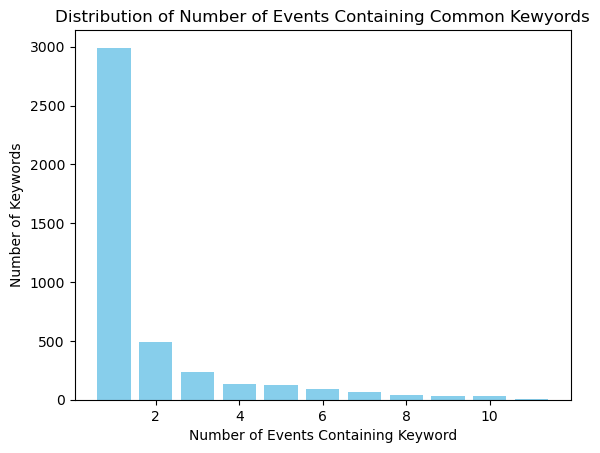

In [186]:
plt.bar(value_counts.index, value_counts.values, color = 'skyblue')
plt.xlabel('Number of Events Containing Keyword')
plt.ylabel('Number of Keywords')
plt.title('Distribution of Number of Events Containing Common Kewyords')
plt.show()

In [193]:
condition = kw_freq['Frequency'] == 1
kw_freq_nontrivial = kw_freq[~condition]

In [189]:
kw_freq_nontrivial

Keyword  Frequency
0                      extended family members         11
1                                  family life         10
2                                     brothers         10
3                            family businesses          6
4                                      schools         11
...                                        ...        ...
4107                         legal occupations          3
4111  government and civil service occupations          2
4116                                   Fascism          2
4117                               anti-racism          2
4118                                  misogyny          4

[1252 rows x 2 columns]

In [190]:
new_value_counts = kw_freq_nontrivial['Frequency'].value_counts().sort_index()

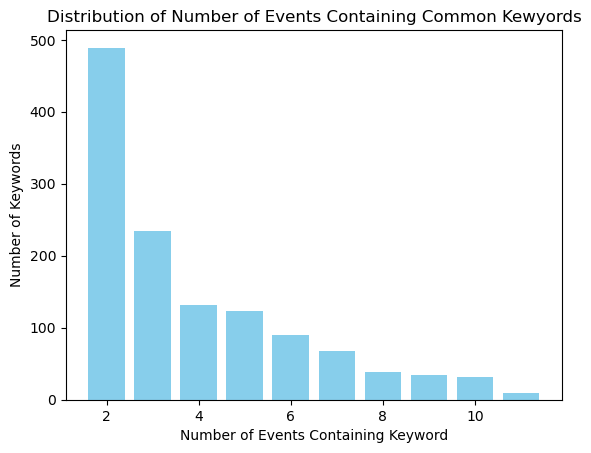

In [192]:
plt.bar(new_value_counts.index, new_value_counts.values, color = 'skyblue')
plt.xlabel('Number of Events Containing Keyword')
plt.ylabel('Number of Keywords')
plt.title('Distribution of Number of Events Containing Common Kewyords')
plt.show()

In [203]:
def kw_list(t, name):
    condition = kw_freq['Frequency'] == t
    name = kw_freq.loc[condition, 'Keyword'].tolist()
    return(name)


In [204]:
kw_list(1, "kw_1")

['ghettoization',
 'camp punishments',
 'camp childbearing',
 'camp humiliation',
 'camp intake procedures',
 'camp doctors',
 'camp selections',
 'Lagerälteste',
 'camp medical experiments',
 'camp mass executions',
 'camp prisoner insignia',
 'inter-prisoner behavioral conduct',
 'prisoner doctors',
 'camp betrayals',
 'war crimes investigations',
 'ghetto hiding and evasion',
 'post-liberation camp/ghetto transition',
 'persecuted group insignia (stills)',
 'birth certificates (stills)',
 'ghettoization preparations',
 'ghetto adaptation methods',
 'factory forced labor',
 'ghetto forced labor',
 'ghetto currency',
 'ghetto food acquisition',
 'ghetto food',
 'ghetto family interactions',
 'ghetto sanitary conditions',
 'camp procedures',
 'Braunschweig (Germany)(generic)',
 'Komsomol',
 'war crimes trial-related psychological reactions',
 'Allied-appointed administrative personnel',
 'ORT',
 'class photographs (stills)',
 'prisoner uniforms photographs (stills)',
 'enforced residen

In [206]:
kw_list(2, "kw_2")

['camp-related aid giving',
 'camp liberation',
 'Holocaust testimony sharing reluctance',
 'trains',
 'transfer from prisons',
 'transfer to prisons',
 'transfers, means of transport',
 'camp brutal treatment',
 'forced labor civilian supervisors',
 'camp hospitals',
 'female prisoners',
 'handicapped prisoners',
 'freight trains',
 'transfer-related aid giving',
 'camp resistance',
 'prisoner medical personnel',
 'concentration camps (stills)',
 'forced labor battalion living conditions',
 'forced labor battalion escapes',
 'Holocaust faith issues',
 'ghetto living conditions',
 'camp family interactions',
 'camp food acquisition',
 'liberator responses',
 'transfer food',
 'synagogues',
 'Nazism',
 'antisemitic propaganda',
 'racial antisemitism',
 'graves (stills)',
 'post-liberation family photographs (stills)',
 'camp deaths',
 'identification papers (stills)',
 'Holocaust documented evidence',
 'pogroms',
 'Shabbat',
 'camp sanitary conditions',
 'forced march conditions',
 'for

In [209]:
kw_list(3, "kw_3")

['persecuted group insignia',
 'prisoners',
 'camp medical care',
 'Holocaust-related psychological reactions',
 'camp living conditions',
 'camp forced labor',
 'camp killings',
 'construction forced labor',
 'forced labor conditions',
 'camp escapes',
 'sabotage',
 'black market activities',
 'military and police uniforms photographs (stills)',
 'hiding discovery fears',
 'deportations, means of transport',
 'Holocaust testimony sharing willingness',
 'antisemitism',
 'deportation procedures',
 'camp housing conditions',
 'camp adaptation methods',
 'tutors',
 'refugee-related psychological reactions',
 'Holocaust education',
 'liberation-related psychological reactions',
 'passenger trains',
 'correspondence (stills)',
 'resistance group weapons',
 'resistance group inter-group conflicts',
 'forced march brutal treatment',
 'forced march escapes',
 'smuggling',
 'post-liberation photographs (stills)',
 'personal services forced labor',
 'perpetrator liberator-approach responses',
 '

In [208]:
kw_list(4, "kw_4")

['trucks',
 'preferential treatment',
 'resistance group leaders',
 'photographs (stills)',
 'escapee capture',
 'deportation awareness',
 'religious identity',
 'deportation conditions',
 'camp food',
 'post-conflict aid giver-aid recipient relations',
 'identity concealment-related psychological reactions',
 'identity concealment (aid giving)',
 'identity exposure',
 'front-line military service',
 'weddings (stills)',
 'documents and artifacts (stills)',
 'publications (stills)',
 'escape routes',
 'resistance group living conditions',
 'body searches',
 'personal property sales',
 'hiding-related family interactions',
 'malaria',
 'factories',
 'international migration routes',
 'survivor organizations',
 'psychological distress prevention',
 'aborted killings',
 'corpse disposal forced labor',
 'camp hunger',
 'deportation routes',
 'suicide decisions',
 'refugee housing',
 'prison living conditions',
 'hiding-related psychological reactions',
 'barter',
 'restricted housing',
 'v

In [210]:
kw_list(5, "kw_5")

['food rationing',
 'betrayals',
 'escape decisions',
 'resistance groups',
 'compulsory military enlistment',
 'false documents',
 'passing',
 'illegal border crossings',
 'suicides',
 'alcohol',
 'church attendance',
 'rescue',
 'selections',
 'false names',
 'military uniforms',
 'executions',
 'sanitary conditions',
 'survivor guilt',
 'migration policies',
 'child placement',
 'international flight routes',
 'family homes (stills)',
 'literary recitals',
 'escape preparations',
 'military retreat',
 'metaphysical experiences',
 'post-conflict return journeys',
 'domestic staff',
 'hiding-related decisions',
 'survivor marriages',
 'suicide discussions',
 'official registration',
 'hiding valuables',
 'national holidays and memorial days',
 'convents and monasteries',
 'deportation brutal treatment',
 'musical recitals',
 'political identity',
 'child abuse',
 'undated family photographs (stills)',
 'employment assistance',
 'deportation adaptation methods',
 'political opponent ar

In [211]:
kw_list(6, "kw_6")

['family businesses',
 'prisons',
 'forced marches',
 'national identity',
 'granddaughters',
 'migration assistance',
 'post-conflict medical problems',
 "loved ones' introductions",
 "children's homes",
 'attitudes toward communism and/or communists',
 'punishments',
 'adoptions',
 'resistance fighters',
 'restitution',
 'war-related experience psychological reactions',
 'acculturation',
 'interviewee original works',
 'incarceration releases',
 'inter-survivor relations',
 'post-conflict persecution site visits',
 'philanthropic activities',
 'covert activities',
 'marital dissolutions',
 'citizenship',
 'domestic migration routes',
 'wartime family interactions',
 'attitudes toward aid givers',
 'roundups',
 'civilian expulsions',
 'agricultural forced labor',
 'liberation',
 'flight preparations',
 'intergenerational genocide impact',
 'sexual assault fears',
 'hiding (aid giving)',
 'covert communications',
 'hiding discovery',
 'voluntary military enlistment',
 'creative works (

In [212]:
kw_list(7, "kw_7")

["loved ones' final contacts",
 'grandmothers',
 'childhood perceptions',
 'interviewee photographs (stills)',
 'military service',
 'flight attempts',
 'hiding places',
 'hiding adaptation methods',
 'post-conflict family home returns',
 'looting',
 "loved ones' contacts",
 'rumors',
 'identity concealment',
 'family pets',
 'writing',
 'interrogations',
 'memorials and museums',
 'survival explanations',
 'roundup evasion',
 'ethnic identity',
 'family histories',
 'domestic flight routes',
 'shelter provision',
 'funerals',
 'begging',
 'creative works',
 'forced labor',
 'grandchildren',
 'farms',
 'post-conflict visits home',
 'fine arts',
 'child killings',
 'perpetrator deceptions',
 'revenge acts',
 'stealing',
 'financial assistance',
 'housing conditions',
 'hiding-related living conditions',
 'hiding-related food acquisition',
 'commemoration',
 'performing arts',
 'refugees',
 'grandsons',
 'war casualties',
 'lost property recovery',
 'mass graves',
 'resistance',
 'grandf

In [213]:
kw_list(8, "kw_8")

['migration decisions',
 'grandparents',
 'arrests',
 'sustenance provision',
 'medical care provision',
 'friendships',
 'courtships',
 'early personal aspirations',
 'hiding',
 'bribery',
 'trauma-related dreams',
 'hunger',
 'post-conflict adaptation',
 'identification papers',
 'professional training',
 'migration discussions',
 'diseases',
 'vocational training',
 'food acquisition',
 'environmental conditions',
 'bereavement-related psychological reactions',
 'self-preservation acts',
 'mass executions',
 'aid refusal',
 'burnings',
 'helplessness',
 'food sharing',
 'daughters',
 'media coverage',
 'government assistance appeals',
 'weapons',
 'determination',
 'abductions',
 'post-conflict justice',
 'pain',
 'depression',
 'anger',
 'reconciliation',
 'post-traumatic stress syndrome']

In [214]:
kw_list(9, "kw_9")

['tracing loved ones',
 'beatings',
 'brutal treatment',
 'warnings',
 'bombardments',
 'medical care',
 'flight decisions',
 'flight assistance',
 'civilian aid givers',
 'teachers',
 'social relations',
 'sexual assaults',
 'friends',
 'mass murder awareness',
 "loved ones' togetherness decisions",
 'evasion',
 'hospitals',
 'childbearing',
 'physical condition',
 "spouses' occupations",
 "fathers' occupations",
 "mothers' occupations",
 'clothing provision',
 'marriages',
 'attitudes toward perpetrators',
 'political activities',
 'refugee camp living conditions',
 'education interruption',
 'wives',
 'ethno-national conflicts',
 'hope',
 'sadness',
 'death fears',
 'despair',
 'calm']

In [215]:
kw_list(10, "kw_10")

['family life',
 'brothers',
 'cultural activities',
 "loved ones' deaths",
 'corpses',
 'working life',
 'education',
 'shootings',
 "loved ones' renewed contacts",
 'aid giving',
 'politico-military event awareness',
 'adaptation methods',
 'flight',
 'humiliation',
 'killings',
 'games',
 'socioeconomic status',
 'sisters',
 'testimony-sharing motivations',
 'family homes',
 'clothing',
 'fathers',
 'injuries',
 "interviewees' children",
 'danger misconceptions',
 'deaths',
 'children',
 'mothers',
 'fear',
 'sons',
 'husbands',
 'threats']

In [216]:
kw_list(11, "kw_11")

['extended family members',
 'schools',
 "loved ones' fates",
 'future message',
 "loved ones' separations",
 'property seizure',
 'living conditions',
 'food',
 'interviewee occupations',
 'flight discussions']

In [221]:
test = pd.DataFrame({'Keywords in One Event': kw_list(1, "kw_1"), "Keywords in Two Events": kw_list(2, "kw_2")})

ValueError: All arrays must be of the same length

In [222]:
lists = {}
for i in range(1,12):
    list_name = f'kw_{i}'
    lists[list_name] = kw_list(i, list_name)

In [223]:
lists

{'kw_1': ['ghettoization',
  'camp punishments',
  'camp childbearing',
  'camp humiliation',
  'camp intake procedures',
  'camp doctors',
  'camp selections',
  'Lagerälteste',
  'camp medical experiments',
  'camp mass executions',
  'camp prisoner insignia',
  'inter-prisoner behavioral conduct',
  'prisoner doctors',
  'camp betrayals',
  'war crimes investigations',
  'ghetto hiding and evasion',
  'post-liberation camp/ghetto transition',
  'persecuted group insignia (stills)',
  'birth certificates (stills)',
  'ghettoization preparations',
  'ghetto adaptation methods',
  'factory forced labor',
  'ghetto forced labor',
  'ghetto currency',
  'ghetto food acquisition',
  'ghetto food',
  'ghetto family interactions',
  'ghetto sanitary conditions',
  'camp procedures',
  'Braunschweig (Germany)(generic)',
  'Komsomol',
  'war crimes trial-related psychological reactions',
  'Allied-appointed administrative personnel',
  'ORT',
  'class photographs (stills)',
  'prisoner unifor

In [226]:
type("kw_11")

str

In [228]:
def new_kw_list(t):
    condition = kw_freq['Frequency'] == t
    return(kw_freq.loc[condition, 'Keyword'].tolist())

In [230]:
lists = {}
for i in range(1,12):
    list_name = f'kw_{i}'
    lists[list_name] = new_kw_list(i)


In [231]:
lists

{'kw_1': ['ghettoization',
  'camp punishments',
  'camp childbearing',
  'camp humiliation',
  'camp intake procedures',
  'camp doctors',
  'camp selections',
  'Lagerälteste',
  'camp medical experiments',
  'camp mass executions',
  'camp prisoner insignia',
  'inter-prisoner behavioral conduct',
  'prisoner doctors',
  'camp betrayals',
  'war crimes investigations',
  'ghetto hiding and evasion',
  'post-liberation camp/ghetto transition',
  'persecuted group insignia (stills)',
  'birth certificates (stills)',
  'ghettoization preparations',
  'ghetto adaptation methods',
  'factory forced labor',
  'ghetto forced labor',
  'ghetto currency',
  'ghetto food acquisition',
  'ghetto food',
  'ghetto family interactions',
  'ghetto sanitary conditions',
  'camp procedures',
  'Braunschweig (Germany)(generic)',
  'Komsomol',
  'war crimes trial-related psychological reactions',
  'Allied-appointed administrative personnel',
  'ORT',
  'class photographs (stills)',
  'prisoner unifor

In [232]:
kw_1

NameError: name 'kw_1' is not defined

In [233]:
lists[kw_1]

NameError: name 'kw_1' is not defined

In [234]:
lists['kw_1']

['ghettoization',
 'camp punishments',
 'camp childbearing',
 'camp humiliation',
 'camp intake procedures',
 'camp doctors',
 'camp selections',
 'Lagerälteste',
 'camp medical experiments',
 'camp mass executions',
 'camp prisoner insignia',
 'inter-prisoner behavioral conduct',
 'prisoner doctors',
 'camp betrayals',
 'war crimes investigations',
 'ghetto hiding and evasion',
 'post-liberation camp/ghetto transition',
 'persecuted group insignia (stills)',
 'birth certificates (stills)',
 'ghettoization preparations',
 'ghetto adaptation methods',
 'factory forced labor',
 'ghetto forced labor',
 'ghetto currency',
 'ghetto food acquisition',
 'ghetto food',
 'ghetto family interactions',
 'ghetto sanitary conditions',
 'camp procedures',
 'Braunschweig (Germany)(generic)',
 'Komsomol',
 'war crimes trial-related psychological reactions',
 'Allied-appointed administrative personnel',
 'ORT',
 'class photographs (stills)',
 'prisoner uniforms photographs (stills)',
 'enforced residen

In [235]:
max_length = len(lists['kw_1'])

In [236]:
max_length

2992

In [242]:
def pad_list(list, length, placeholder = ""):
    return list + [placeholder]*(length - len(list))

In [244]:
test1 = pd.DataFrame({
    'Keywords in One Event': pad_list(lists['kw_1'], max_length),
    'Keywords in Two Events': pad_list(lists['kw_2'], max_length)
})

In [245]:
test1

Keywords in One Event                  Keywords in Two Events
0                 ghettoization                 camp-related aid giving
1              camp punishments                         camp liberation
2             camp childbearing  Holocaust testimony sharing reluctance
3              camp humiliation                                  trains
4        camp intake procedures                   transfer from prisons
...                         ...                                     ...
2987               Eubee (Ship)                                        
2988   Forst (Germany)(generic)                                        
2989          Brit Ivrit Olamit                                        
2990  Dusnok (Hungary)(generic)                                        
2991  Chelmno (Poland)(generic)                                        

[2992 rows x 2 columns]

In [246]:
kw_by_n_events = pd.DataFrame({
    'Keywords in One Event': pad_list(lists['kw_1'], max_length),
    'Keywords in Two Events': pad_list(lists['kw_2'], max_length),
    'Keywords in Three Events': pad_list(lists['kw_3'], max_length),
    'Keywords in Four Events': pad_list(lists['kw_4'], max_length),
    'Keywords in Five Events': pad_list(lists['kw_5'], max_length),
    'Keywords in Six Events': pad_list(lists['kw_6'], max_length),
    'Keywords in Seven Events': pad_list(lists['kw_7'], max_length),
    'Keywords in Eight Events': pad_list(lists['kw_8'], max_length),
    'Keywords in Nine Events': pad_list(lists['kw_9'], max_length),
    'Keywords in Ten Events': pad_list(lists['kw_10'], max_length),
    'Keywords in Eleven Events': pad_list(lists['kw_11'], max_length)
})

In [247]:
kw_by_n_events

Keywords in One Event                  Keywords in Two Events  \
0                 ghettoization                 camp-related aid giving   
1              camp punishments                         camp liberation   
2             camp childbearing  Holocaust testimony sharing reluctance   
3              camp humiliation                                  trains   
4        camp intake procedures                   transfer from prisons   
...                         ...                                     ...   
2987               Eubee (Ship)                                           
2988   Forst (Germany)(generic)                                           
2989          Brit Ivrit Olamit                                           
2990  Dusnok (Hungary)(generic)                                           
2991  Chelmno (Poland)(generic)                                           

                       Keywords in Three Events   Keywords in Four Events  \
0                     persecuted group insignia                    trucks   
1                                     prisoners    preferential treatment   
2                             camp medical care  resistance group leaders   
3     Holocaust-related psychological reactions      photographs (stills)   
4                        camp living conditions           escapee capture   
...                                         ...                       ...   
2987                                                                        
2988                                                                        
2989                                                                        
2990                                                                        
2991                                                                        

             Keywords in Five Events Keywords in Six Events  \
0                     food rationing      family businesses   
1                          betrayals                prisons   
2                   escape decisions         forced marches   
3                  resistance groups      national identity   
4     compulsory military enlistment         granddaughters   
...                              ...                    ...   
2987                                                          
2988                                                          
2989                                                          
2990                                                          
2991                                                          

              Keywords in Seven Events Keywords in Eight Events  \
0           loved ones' final contacts      migration decisions   
1                         grandmothers             grandparents   
2                childhood perceptions                  arrests   
3     interviewee photographs (stills)     sustenance provision   
4                     military service   medical care provision   
...                                ...                      ...   
2987                                                              
2988                                                              
2989                                                              
2990                                                              
2991                                                              

     Keywords in Nine Events Keywords in Ten Events Keywords in Eleven Events  
0         tracing loved ones            family life   extended family members  
1                   beatings               brothers                   schools  
2           brutal treatment    cultural activities         loved ones' fates  
3                   warnings     loved ones' deaths            future message  
4               bombardments                corpses   loved ones' separations  
...                      ...                    ...                       ...  
2987                                                          

In [248]:
kw_by_n_events.to_excel('C:\\Users\\piercev1\\Documents\\Research\\Genocide SHOAH Account XML Files\\Keywords_by_Number_of_Events.xlsx', index = False)

In [249]:
def adjMatrix(mat, t):
    adj_matrix = np.zeros_like(mat, dtype=int)
    adj_matrix[mat < t] = 1
    return(adj_matrix)

In [251]:
distances = pdist(event_level_percentages.T)

In [252]:
event_dist_mat = squareform(distances)

In [253]:
flattend_event_distances = event_dist_mat.flatten()

In [254]:
min = np.min(flattend_event_distances)
first = np.percentile(flattend_event_distances, 25)
median = np.median(flattend_event_distances)
third = np.percentile(flattend_event_distances, 75)
max = np.max(flattend_event_distances)
mean = np.mean(flattend_event_distances)

In [255]:
print("Minimum:", min)
print("First Quartile:", first)
print("Median:", median)
print("Third Quartile:", third)
print("Maximum:", max)
print("Mean:", mean)

Minimum: 0.0
First Quartile: 0.08803917160751396
Median: 0.1215823602967416
Third Quartile: 0.154149995770566
Maximum: 0.21421279334124718
Mean: 0.12114438080468536


In [256]:
events_graph_10 = adjMatrix(event_dist_mat, 0.1)

In [257]:
events_graph_10

array([[1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [258]:
def adjMatrix(mat, t):
    adj_matrix = np.zeros_like(mat, dtype=int)
    adj_matrix[mat < t] = 1
    new_diagonal_value = 0
    np.fill_diagonal(adj_matrix, new_diagonal_value)
    return(adj_matrix)

In [259]:
events_graph_10 = adjMatrix(event_dist_mat, 0.1)

In [260]:
events_graph_10

array([[0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [261]:
G = nx.from_numpy_array(events_graph_10)

In [262]:
layout = nx.random_layout(G)

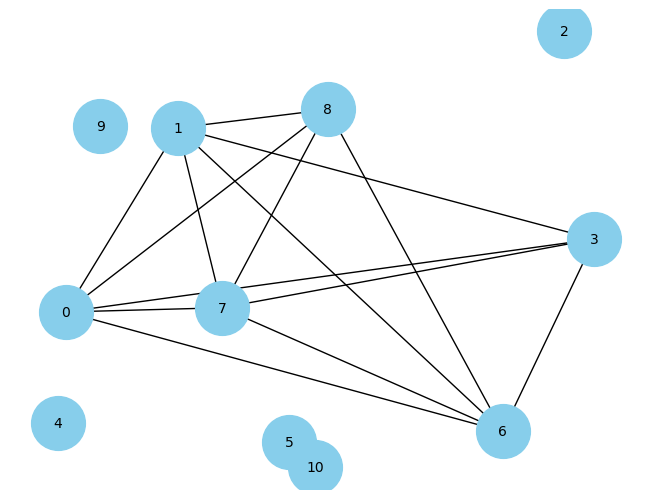

In [263]:
nx.draw(G, pos = layout, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=10)

(0.0, 1.0, 0.0, 1.0)

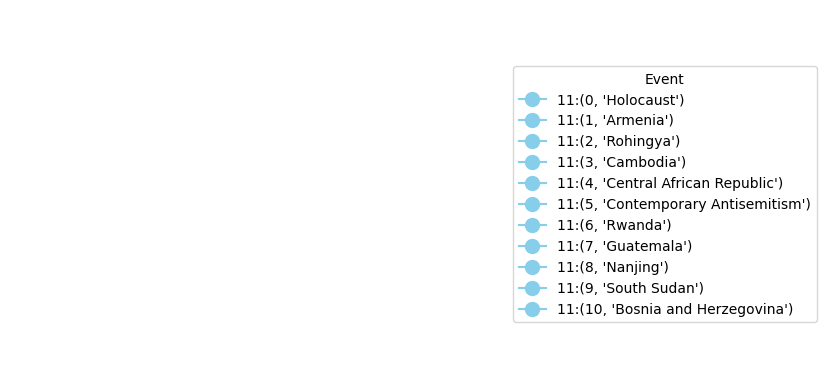

In [266]:
legend_elements = [Line2D([0], [0], marker='o', color='skyblue', markersize=10, label=f'{i}:{label}') for label in enumerate(events)]
plt.legend(handles=legend_elements, title='Event', loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('off')

In [267]:
nx.number_connected_components(G)

6

In [268]:
components = list(nx.connected_components(G))

In [269]:
components[0]

{0, 1, 3, 6, 7, 8}

In [270]:
for i in range(0,nx.number_connected_components(G)):
    num_nodes = len(components[i])
    print(num_nodes)

6
1
1
1
1
1


In [271]:
main_component = components[0]

In [272]:
H = G.subgraph(main_component)

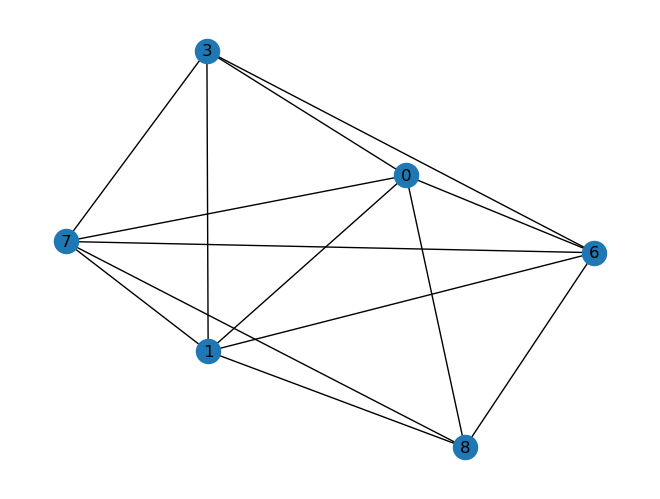

In [274]:
nx.draw(H, with_labels = True)

In [275]:
degrees = dict(H.degree())
for node, degree in degrees.items():
    print(f"Node {node}: Degree = {degree}")

Node 0: Degree = 5
Node 1: Degree = 5
Node 3: Degree = 4
Node 6: Degree = 5
Node 7: Degree = 5
Node 8: Degree = 4


In [276]:
eigenvector_centrality = nx.eigenvector_centrality(H)

In [277]:
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: Eigenvector Centrality = {centrality}")


Node 0: Eigenvector Centrality = 0.428444983589111
Node 1: Eigenvector Centrality = 0.428444983589111
Node 3: Eigenvector Centrality = 0.36451308903063123
Node 6: Eigenvector Centrality = 0.428444983589111
Node 7: Eigenvector Centrality = 0.428444983589111
Node 8: Eigenvector Centrality = 0.36451308903063123


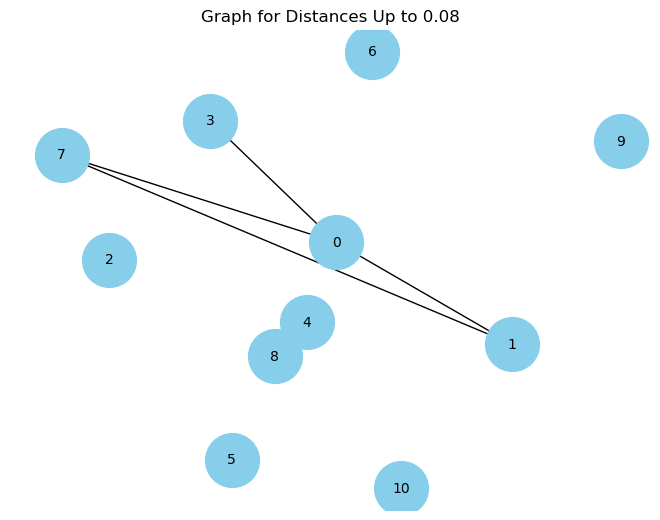

   Component_Number  Number_of_Nodes
0                 0                4
1                 1                1
2                 2                1
3                 3                1
4                 4                1
5                 5                1
6                 6                1
7                 7                1
        Node  Degree  Eigenvector_Centrality
0  Holocaust       3                0.611629
1    Armenia       2                0.522720
2   Cambodia       1                     NaN
3  Guatemala       2                0.281846


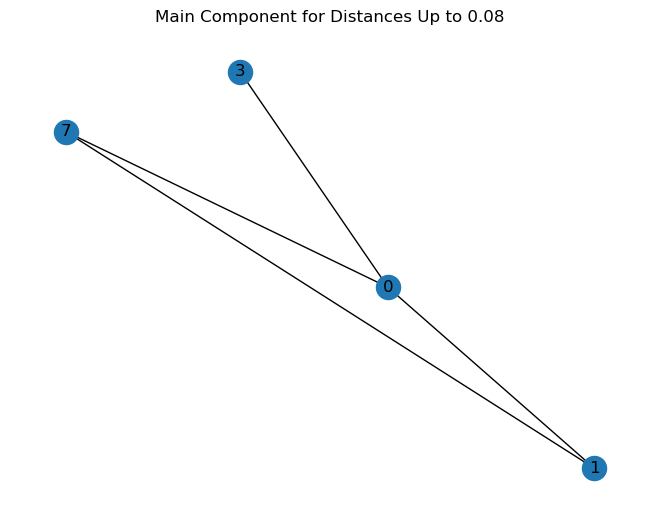

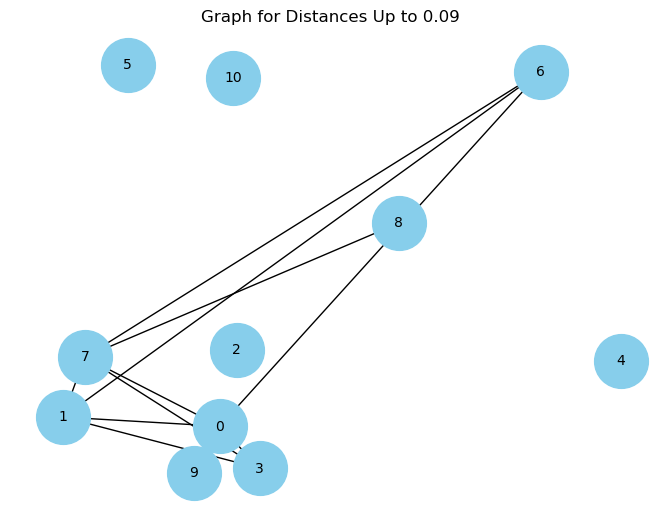

   Component_Number  Number_of_Nodes
0                 0                6
1                 1                1
2                 2                1
3                 3                1
4                 4                1
5                 5                1
        Node  Degree  Eigenvector_Centrality
0  Holocaust       4                0.467901
1    Armenia       4                0.467901
2   Cambodia       3                     NaN
3     Rwanda       3                0.385963
4  Guatemala       5                     NaN
5    Nanjing       1                     NaN


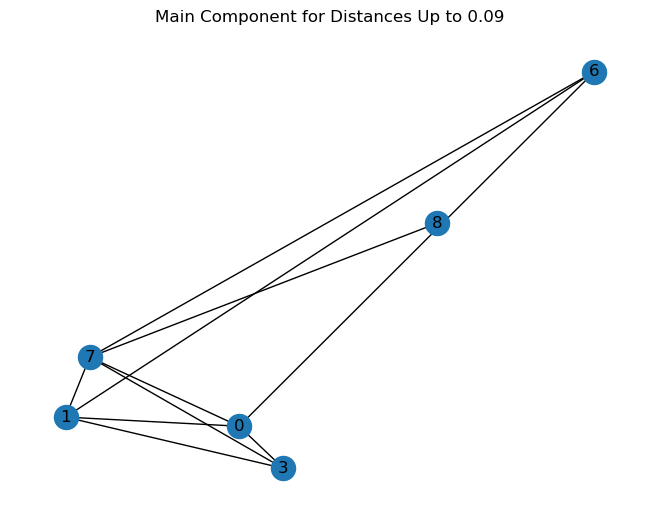

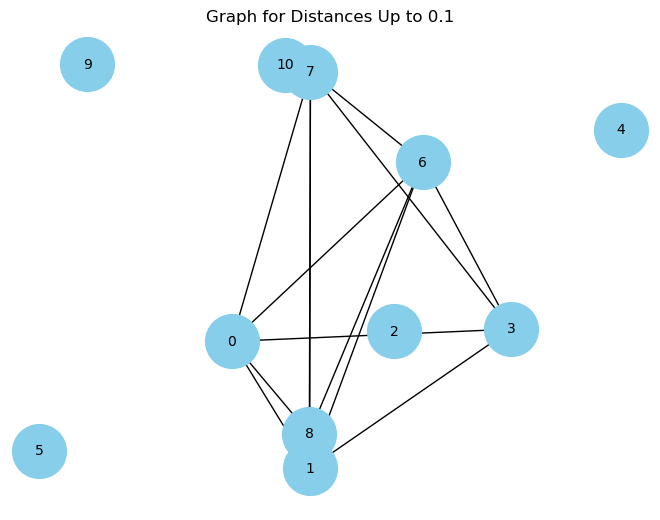

   Component_Number  Number_of_Nodes
0                 0                6
1                 1                1
2                 2                1
3                 3                1
4                 4                1
5                 5                1
        Node  Degree  Eigenvector_Centrality
0  Holocaust       5                0.428445
1    Armenia       5                0.428445
2   Cambodia       4                     NaN
3     Rwanda       5                0.364513
4  Guatemala       5                     NaN
5    Nanjing       4                     NaN


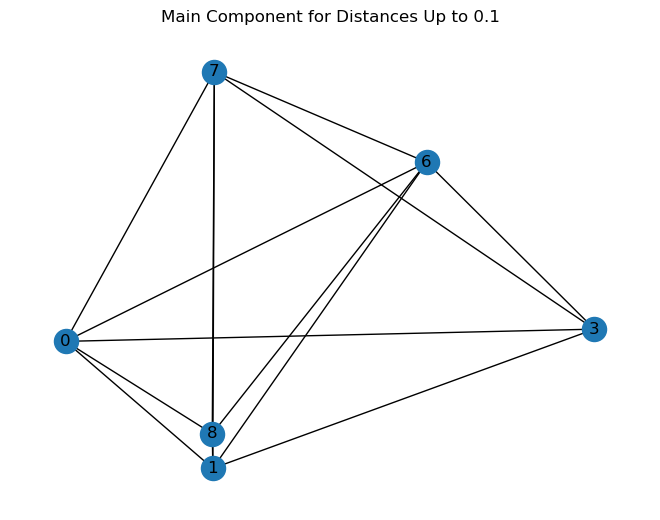

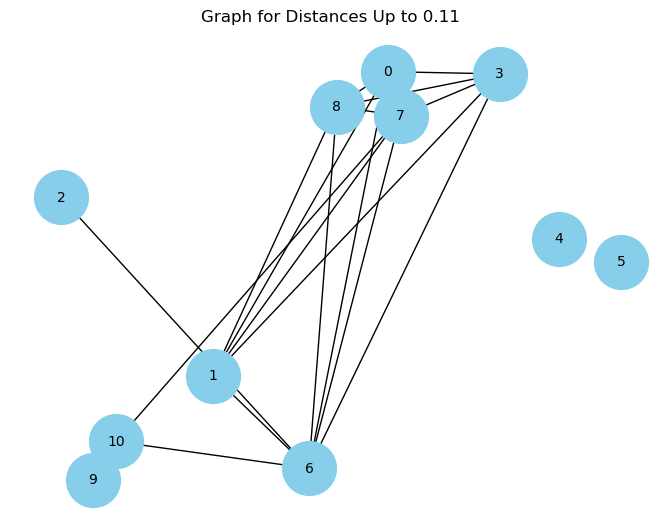

   Component_Number  Number_of_Nodes
0                 0                8
1                 1                1
2                 2                1
3                 3                1
                     Node  Degree  Eigenvector_Centrality
0               Holocaust       5                0.389897
1                 Armenia       5                0.389897
2                Rohingya       1                0.083143
3                Cambodia       5                0.389897
4                  Rwanda       7                     NaN
5               Guatemala       6                     NaN
6                 Nanjing       5                0.429897
7  Bosnia and Herzegovina       2                0.416422


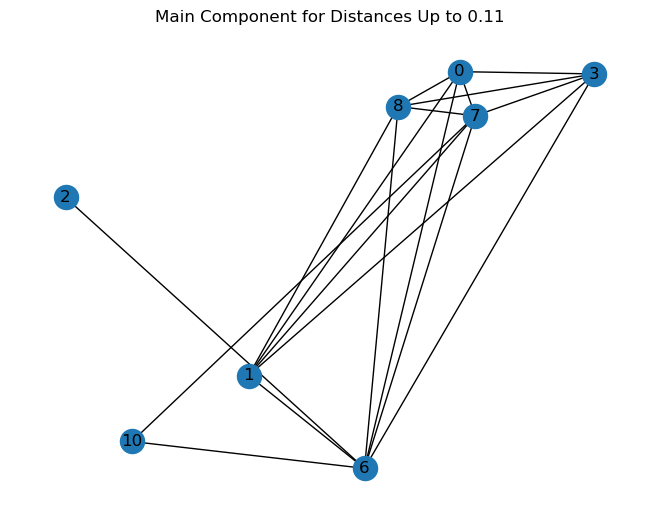

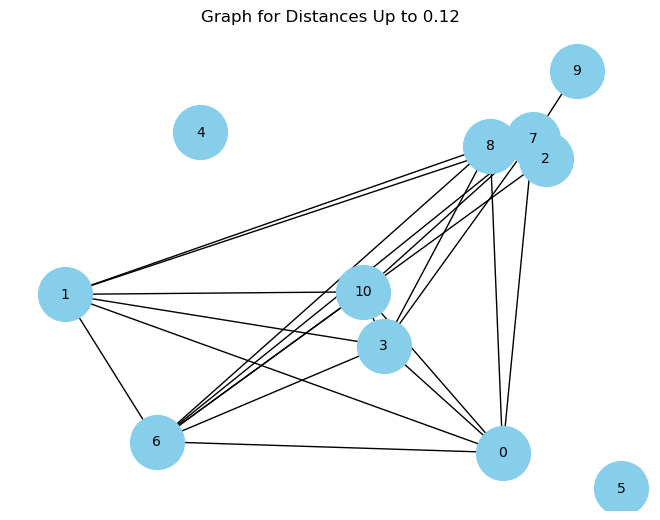

   Component_Number  Number_of_Nodes
0                 0                9
1                 1                1
2                 2                1
                     Node  Degree  Eigenvector_Centrality
0               Holocaust       6                0.369506
1                 Armenia       6                0.369506
2                Rohingya       3                0.192856
3                Cambodia       6                0.369506
4                  Rwanda       7                     NaN
5               Guatemala       8                     NaN
6                 Nanjing       6                0.397094
7             South Sudan       1                0.406808
8  Bosnia and Herzegovina       5                0.351428


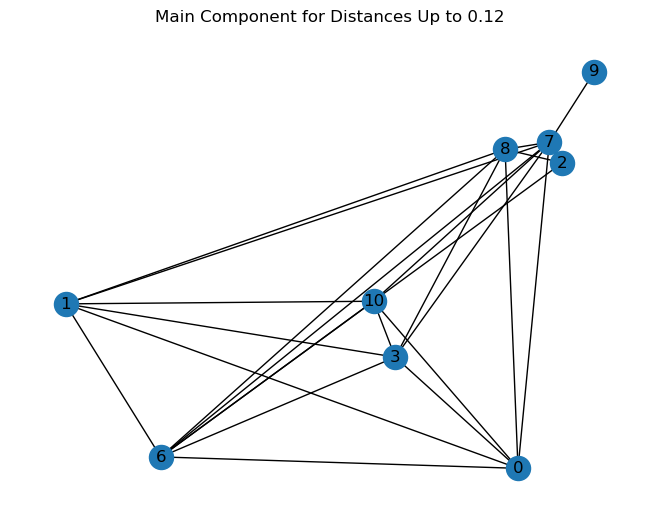

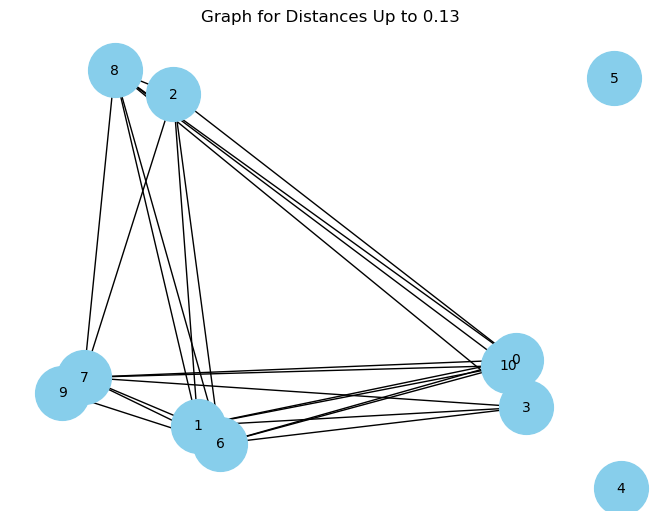

   Component_Number  Number_of_Nodes
0                 0                9
1                 1                1
2                 2                1
                     Node  Degree  Eigenvector_Centrality
0               Holocaust       7                0.365882
1                 Armenia       7                0.365882
2                Rohingya       5                0.279752
3                Cambodia       6                0.329296
4                  Rwanda       8                     NaN
5               Guatemala       8                     NaN
6                 Nanjing       7                0.380870
7             South Sudan       2                0.380870
8  Bosnia and Herzegovina       6                0.365882


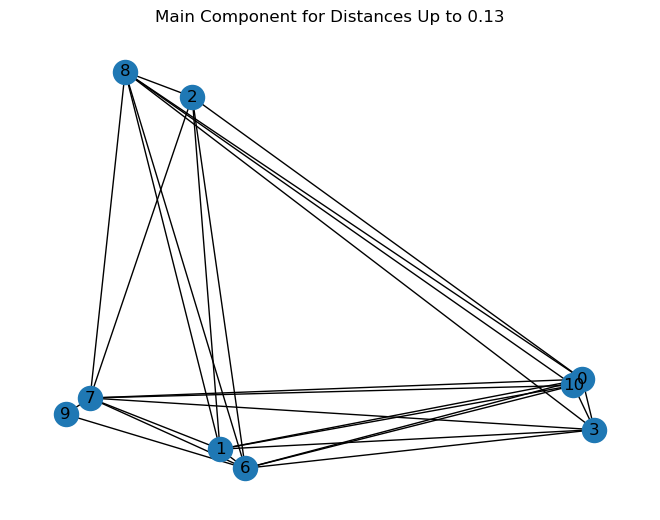

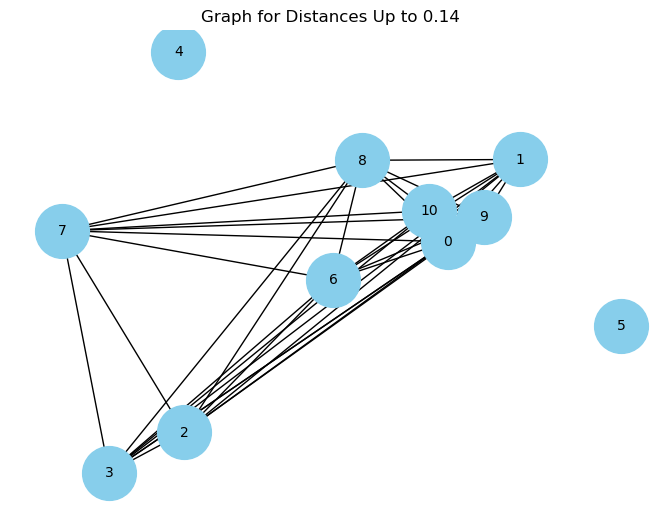

   Component_Number  Number_of_Nodes
0                 0                9
1                 1                1
2                 2                1
                     Node  Degree  Eigenvector_Centrality
0               Holocaust       8                0.340750
1                 Armenia       8                0.340750
2                Rohingya       7                0.305964
3                Cambodia       8                0.340750
4                  Rwanda       8                     NaN
5               Guatemala       8                     NaN
6                 Nanjing       8                0.340750
7             South Sudan       8                0.340750
8  Bosnia and Herzegovina       7                0.340750


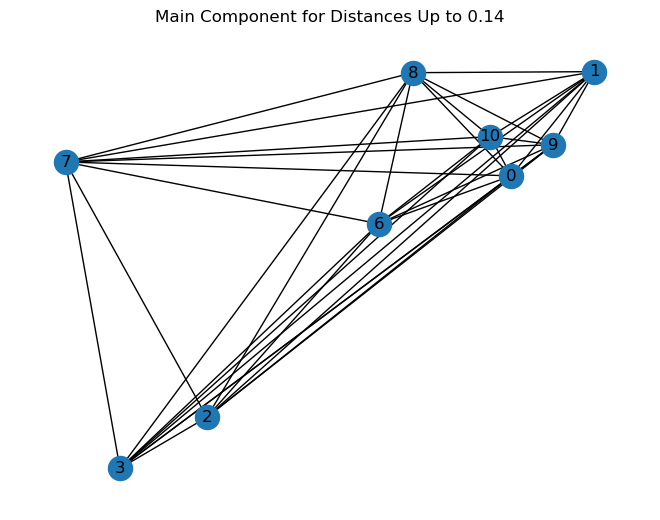

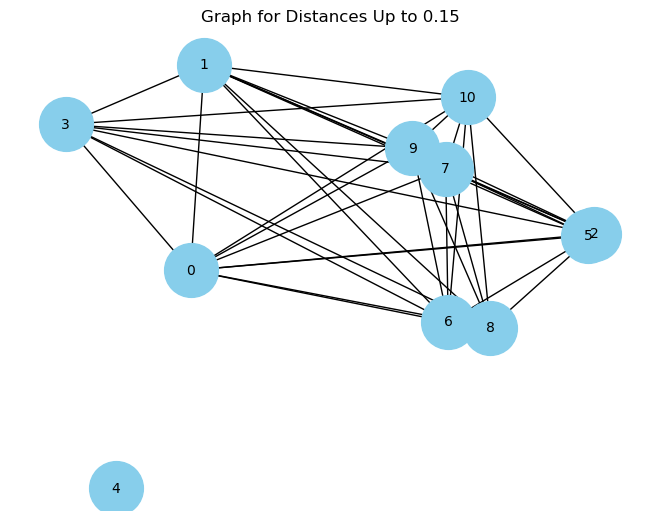

   Component_Number  Number_of_Nodes
0                 0               10
1                 1                1
                        Node  Degree  Eigenvector_Centrality
0                  Holocaust       9                0.339800
1                    Armenia       9                0.339800
2                   Rohingya       8                0.326055
3                   Cambodia       8                0.326055
4  Contemporary Antisemitism       3                     NaN
5                     Rwanda       8                0.125442
6                  Guatemala       9                0.326055
7                    Nanjing       8                0.339800
8                South Sudan       8                0.326055
9     Bosnia and Herzegovina       8                0.326055


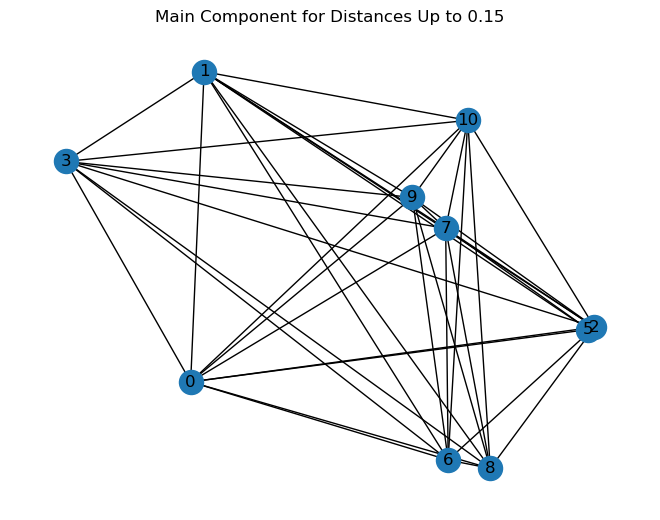

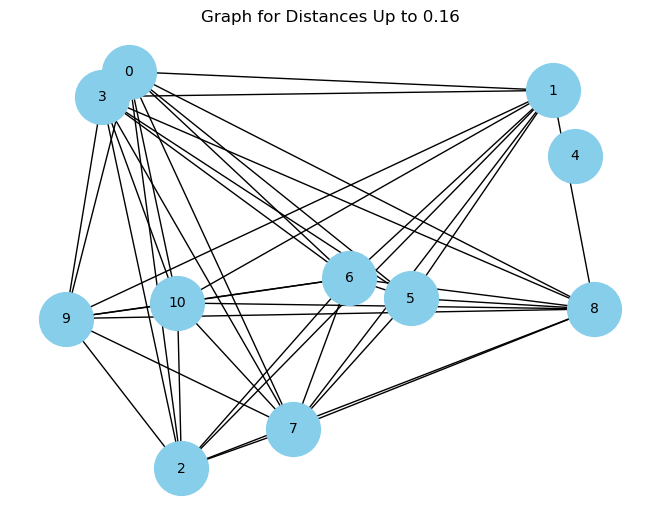

   Component_Number  Number_of_Nodes
0                 0               10
1                 1                1
                        Node  Degree  Eigenvector_Centrality
0                  Holocaust       9                0.332055
1                    Armenia       9                0.332055
2                   Rohingya       8                0.307291
3                   Cambodia       9                0.332055
4  Contemporary Antisemitism       6                     NaN
5                     Rwanda       9                0.234847
6                  Guatemala       9                0.332055
7                    Nanjing       9                0.332055
8                South Sudan       8                0.332055
9     Bosnia and Herzegovina       8                0.307291


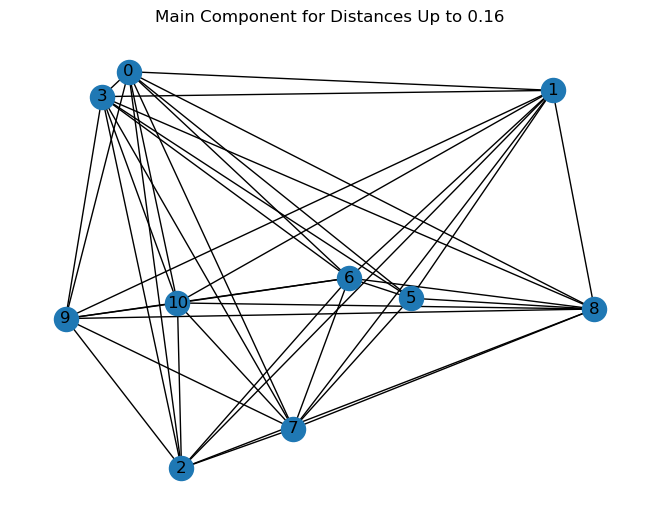

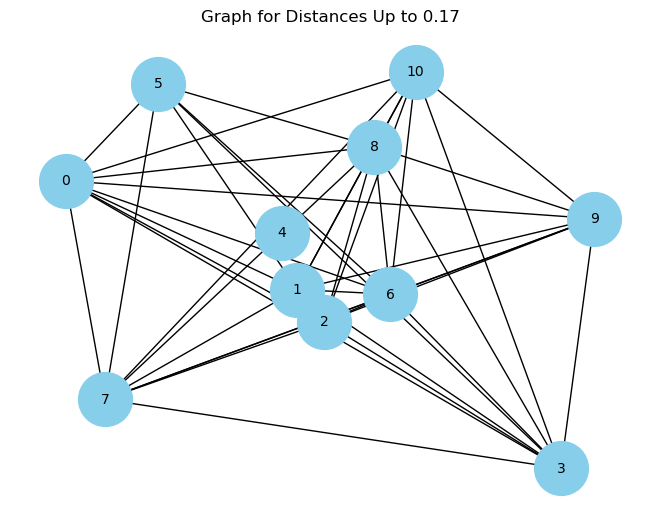

   Component_Number  Number_of_Nodes
0                 0               10
1                 1                1
                        Node  Degree  Eigenvector_Centrality
0                  Holocaust       9                0.332055
1                    Armenia       9                0.332055
2                   Rohingya       8                0.307291
3                   Cambodia       9                0.332055
4  Contemporary Antisemitism       6                     NaN
5                     Rwanda       9                0.234847
6                  Guatemala       9                0.332055
7                    Nanjing       9                0.332055
8                South Sudan       8                0.332055
9     Bosnia and Herzegovina       8                0.307291


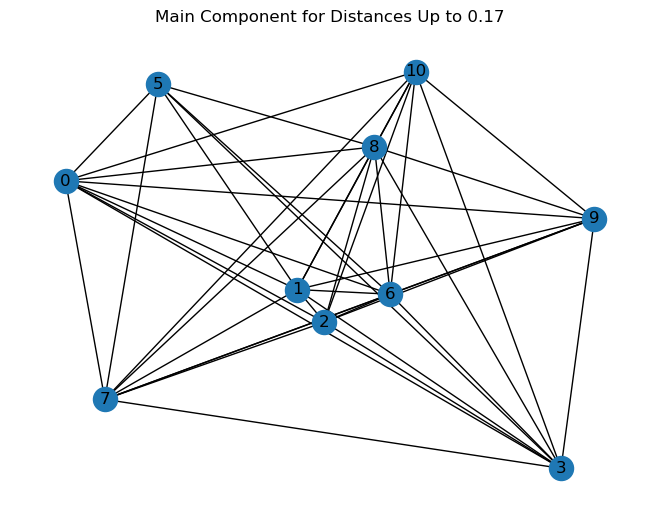

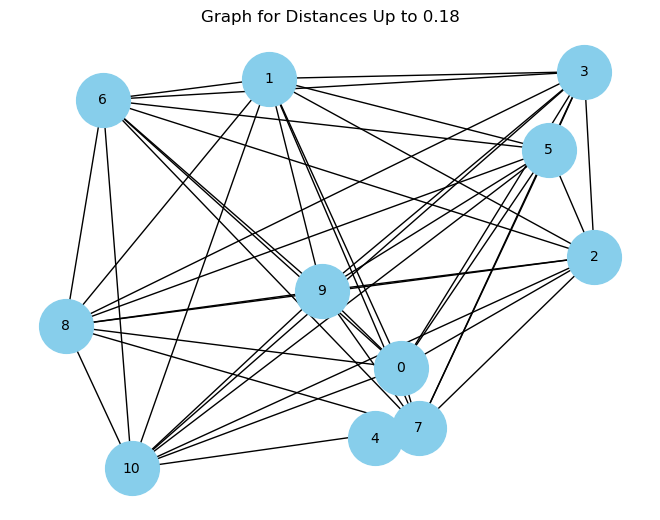

   Component_Number  Number_of_Nodes
0                 0               10
1                 1                1
                        Node  Degree  Eigenvector_Centrality
0                  Holocaust       9                0.316228
1                    Armenia       9                0.316228
2                   Rohingya       9                0.316228
3                   Cambodia       9                0.316228
4  Contemporary Antisemitism       9                     NaN
5                     Rwanda       9                0.316228
6                  Guatemala       9                0.316228
7                    Nanjing       9                0.316228
8                South Sudan       9                0.316228
9     Bosnia and Herzegovina       9                0.316228


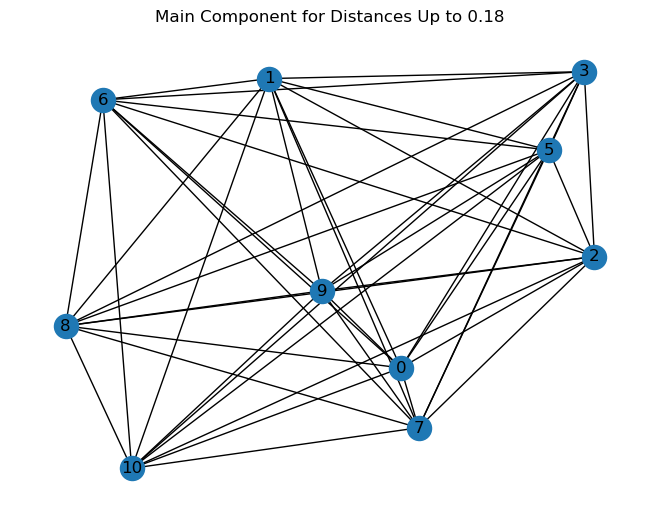

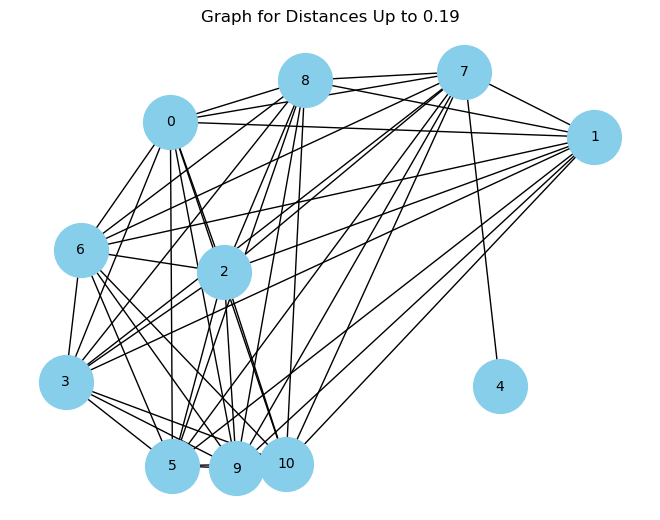

   Component_Number  Number_of_Nodes
0                 0               11
                         Node  Degree  Eigenvector_Centrality
0                   Holocaust       9                0.315674
1                     Armenia       9                0.315674
2                    Rohingya       9                0.315674
3                    Cambodia       9                0.315674
4    Central African Republic       1                0.035424
5   Contemporary Antisemitism       9                0.315674
6                      Rwanda       9                0.315674
7                   Guatemala      10                0.319212
8                     Nanjing       9                0.315674
9                 South Sudan       9                0.315674
10     Bosnia and Herzegovina       9                0.315674


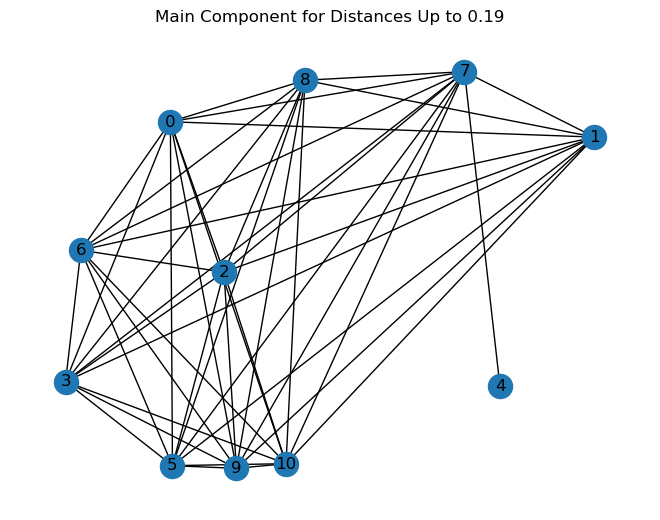

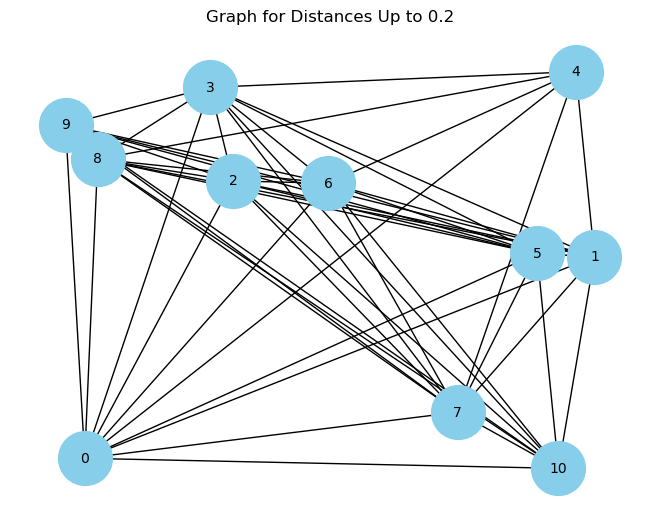

   Component_Number  Number_of_Nodes
0                 0               11
                         Node  Degree  Eigenvector_Centrality
0                   Holocaust      10                0.317317
1                     Armenia      10                0.317317
2                    Rohingya       9                0.297814
3                    Cambodia      10                0.317317
4    Central African Republic       6                0.202696
5   Contemporary Antisemitism       9                0.297814
6                      Rwanda      10                0.317317
7                   Guatemala      10                0.317317
8                     Nanjing      10                0.317317
9                 South Sudan       9                0.297814
10     Bosnia and Herzegovina       9                0.297814


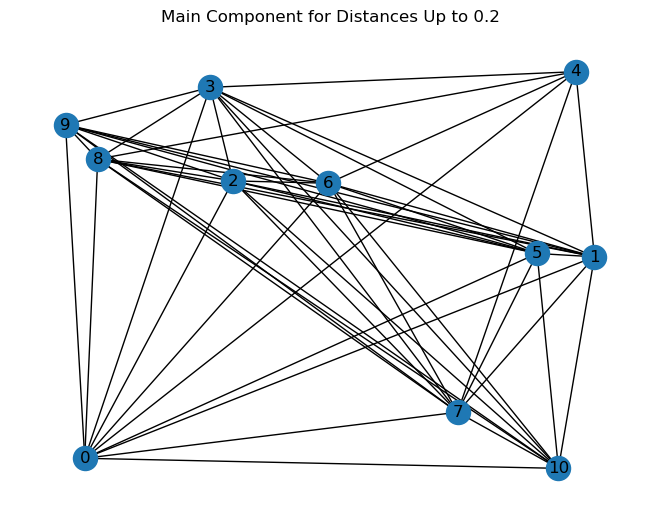

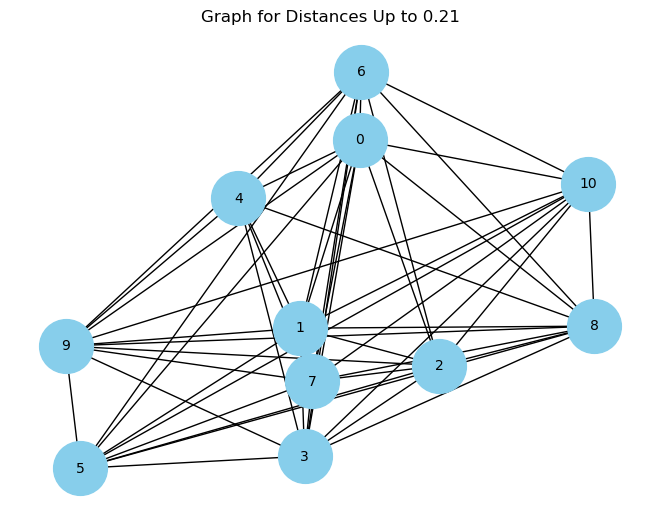

   Component_Number  Number_of_Nodes
0                 0               11
                         Node  Degree  Eigenvector_Centrality
0                   Holocaust      10                0.314103
1                     Armenia      10                0.314103
2                    Rohingya       9                0.292172
3                    Cambodia      10                0.314103
4    Central African Republic       7                0.230827
5   Contemporary Antisemitism       9                0.292172
6                      Rwanda      10                0.314103
7                   Guatemala      10                0.314103
8                     Nanjing      10                0.314103
9                 South Sudan      10                0.314103
10     Bosnia and Herzegovina       9                0.292172


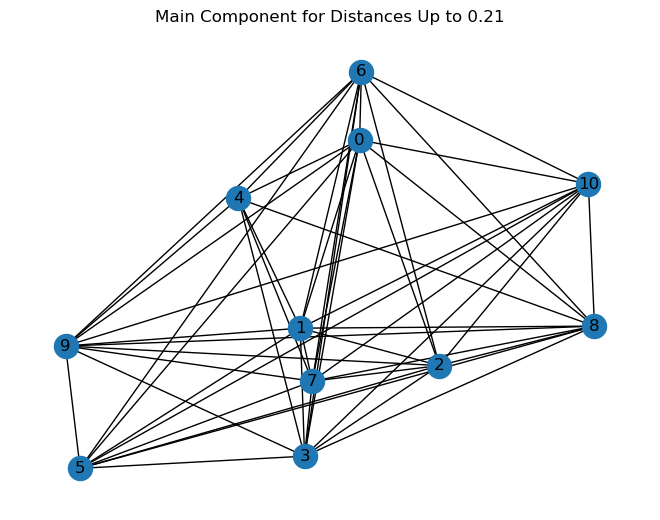

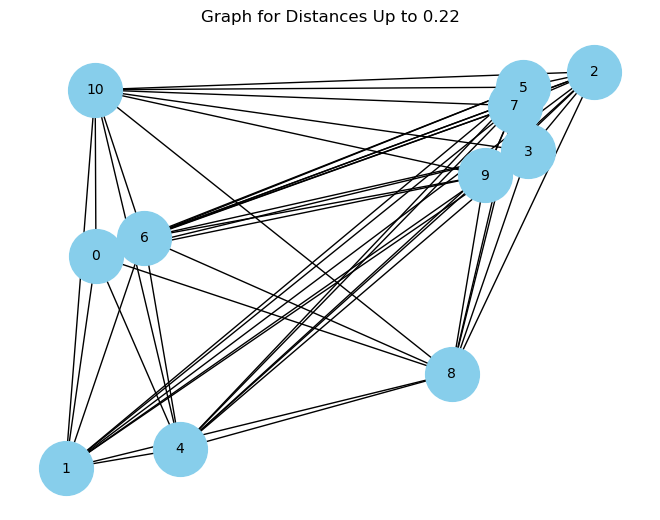

   Component_Number  Number_of_Nodes
0                 0               11
                         Node  Degree  Eigenvector_Centrality
0                   Holocaust      10                0.301511
1                     Armenia      10                0.301511
2                    Rohingya      10                0.301511
3                    Cambodia      10                0.301511
4    Central African Republic      10                0.301511
5   Contemporary Antisemitism      10                0.301511
6                      Rwanda      10                0.301511
7                   Guatemala      10                0.301511
8                     Nanjing      10                0.301511
9                 South Sudan      10                0.301511
10     Bosnia and Herzegovina      10                0.301511


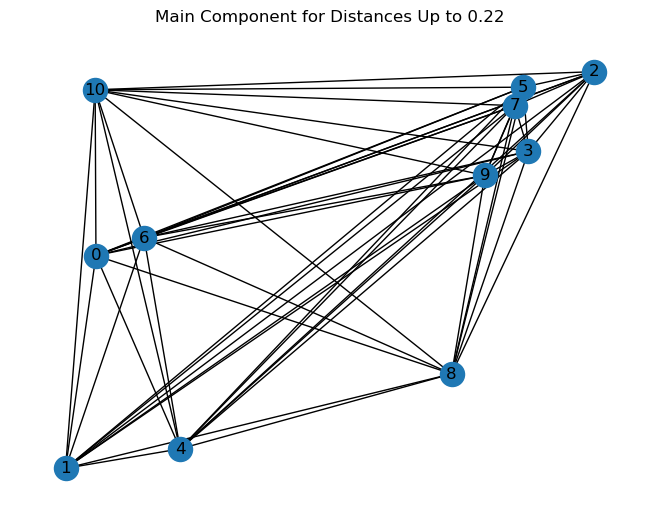

In [293]:
path = 'C:\\Users\\piercev1\\Documents\\Research\\Genocide SHOAH Account XML Files'
filename = 'events_graph_data.xlsx'
excel_name = os.path.join(path, filename)
with pd.ExcelWriter(excel_name) as writer:
    for i in range(8, 23):
        t = i/100
        G = nx.from_numpy_array(adjMatrix(event_dist_mat, t))
        layout = nx.random_layout(G)
        plt.figure()
        nx.draw(G, pos = layout, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=10)
        plt.title(f'Graph for Distances Up to {t}')
        plt.show()
        comp_df = pd.DataFrame()
        n = nx.number_connected_components(G)
        components = list(nx.connected_components(G))
        comp_df["Component_Number"] = list(range(n))
        num_nodes = []
        for j in range(n):
            num_nodes.append(len(components[j]))
        comp_df["Number_of_Nodes"] = num_nodes
        print(comp_df)
        H = G.subgraph(components[0])
        plt.figure()
        nx.draw(H, pos = layout, with_labels=True)
        plt.title(f'Main Component for Distances Up to {t}')
        centrality_df = pd.DataFrame()
        H_nodes = list(H.nodes())
        degrees = [degree for node, degree in H.degree()]
        eigenvector_centrality = nx.eigenvector_centrality(H)
        labels = []
        for node in H_nodes:
            labels.append(events[node])
        centrality_df['Node'] = labels
        centrality_df['Degree'] = degrees
        centrality_df['Eigenvector_Centrality'] = eigenvector_centrality
        print(centrality_df)
        comp_sheet_name = f'Components t={t}'
        centrality_sheet_name = f'Centrality t={t}'
        comp_df.to_excel(writer, sheet_name=comp_sheet_name, index=False)
        centrality_df.to_excel(writer, sheet_name=centrality_sheet_name, index=False)